# Problem statement

An international humanitarian NGO named HELP International wants to help to fight against Poverty by providing the basic amenities and relief during the hard time of disasters and natural calamities. This NGO runs many different projects for fund raising and social awareness.  From their recent fund raising event they got $10 million, Now the senior officials of this NGO wants to know where to use this money most effectively so that they will be able to provide maximum support or help. 
Being as Data analysts we have to identify the countries based on economic and health factors in which NGO needs to provide the help.


In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from matplotlib.pyplot import xticks
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Reading the CSV file
dataframe = pd.read_csv(r'C:\Users\Neemesh\Desktop\Country-data.csv')

In [4]:
dataframe.shape

(167, 10)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
dataframe.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
dataframe.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Exploratory Data Analytics

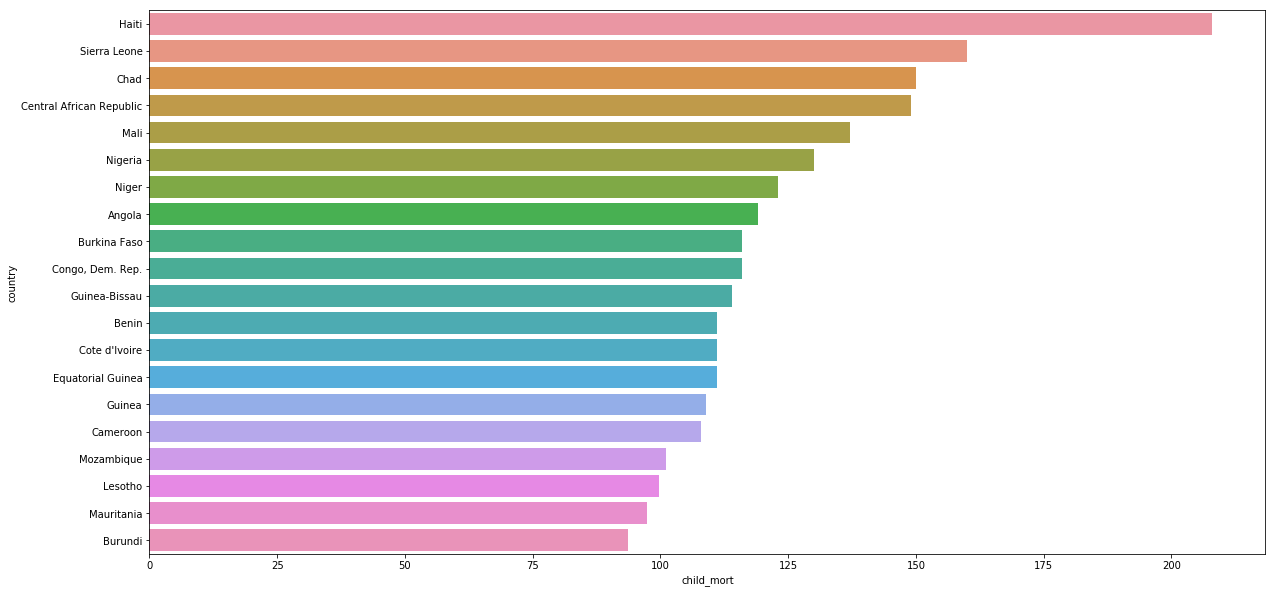

In [8]:
# Child Mortality Rate :- Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (20, 10))
top20_child_mort = dataframe[["country",'child_mort']].sort_values('child_mort', ascending = False).head(20)
plt_child_mort = sns.barplot(x="child_mort", y='country', data= top20_child_mort)
plt.savefig('Child Mortality Rate')

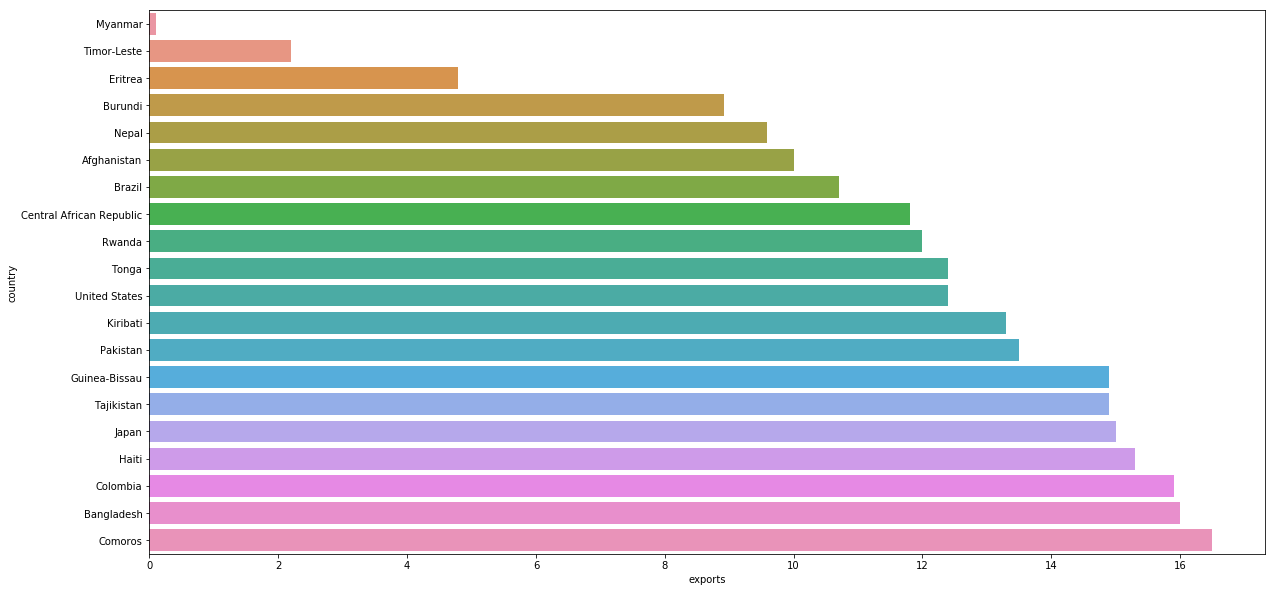

In [9]:
 # Exports :- Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (20, 10))
bottom20_exports = dataframe[["country",'exports']].sort_values('exports', ascending = True).head(20)
plt_exports = sns.barplot(x="exports", y='country', data= bottom20_exports)
plt.savefig('Exports')

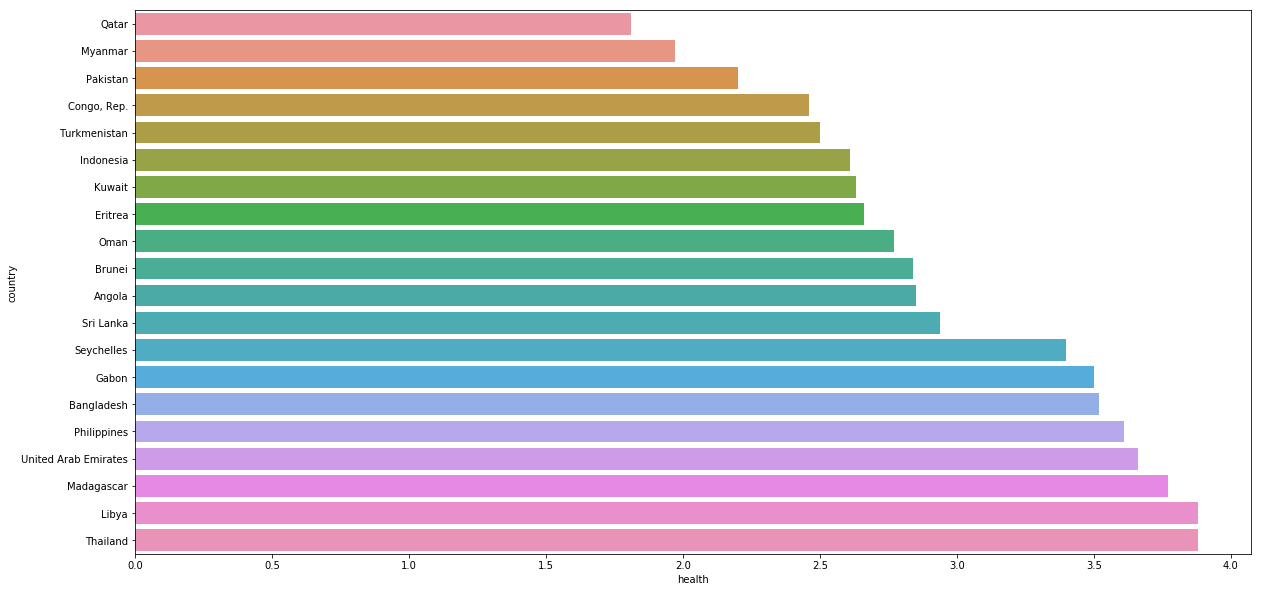

In [9]:
# Health :- Total health spending as %age of Total GDP
plt.figure(figsize = (20, 10))
bottom20_health = df[["country",'health']].sort_values('health', ascending = True).head(20)
plt_health = sns.barplot(x="health", y='country', data= bottom20_health)
plt.savefig('Health')

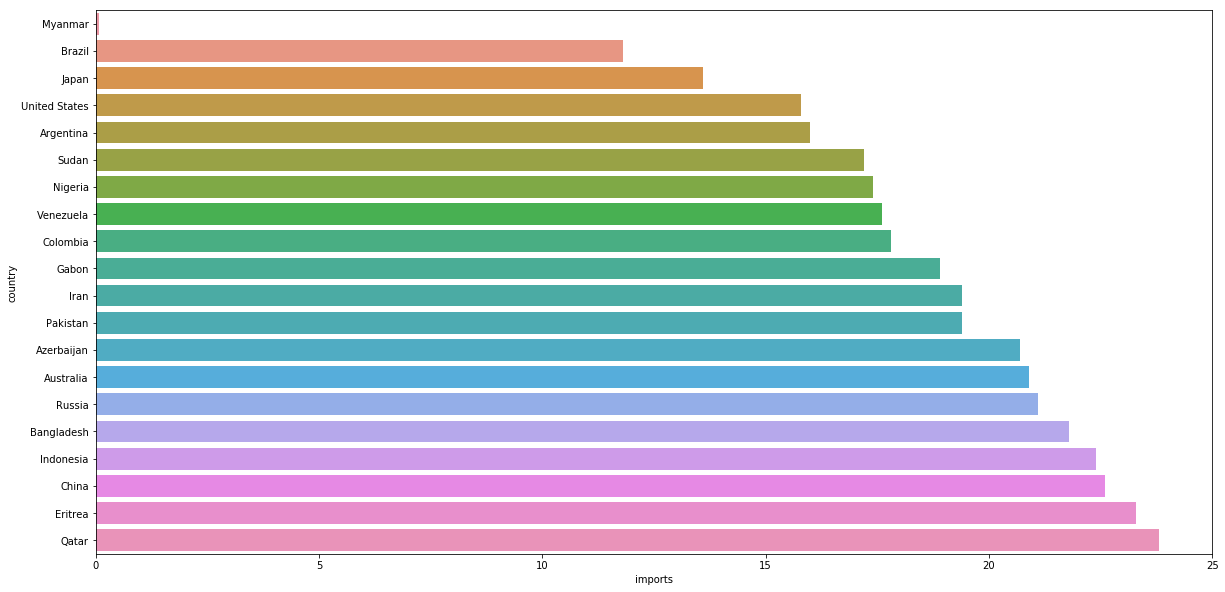

In [10]:
# Imports :- Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (20, 10))
bottom20_imports = dataframe[["country",'imports']].sort_values('imports', ascending = True).head(20)
plt_imports = sns.barplot(x="imports", y='country', data= bottom20_imports)
plt.savefig('Imports')

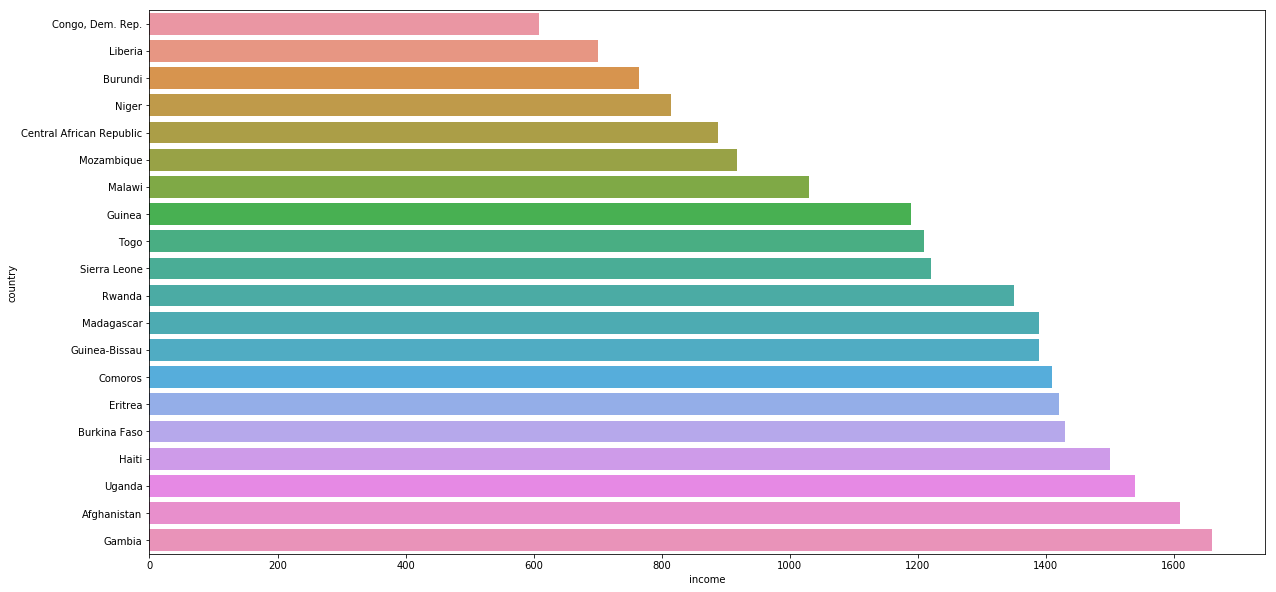

In [11]:
# Income:- Net income per person
plt.figure(figsize = (20, 10))
bottom20_income = dataframe[["country",'income']].sort_values('income', ascending = True).head(20)
plt_income = sns.barplot(x="income", y='country', data= bottom20_income)
plt.savefig('Income')

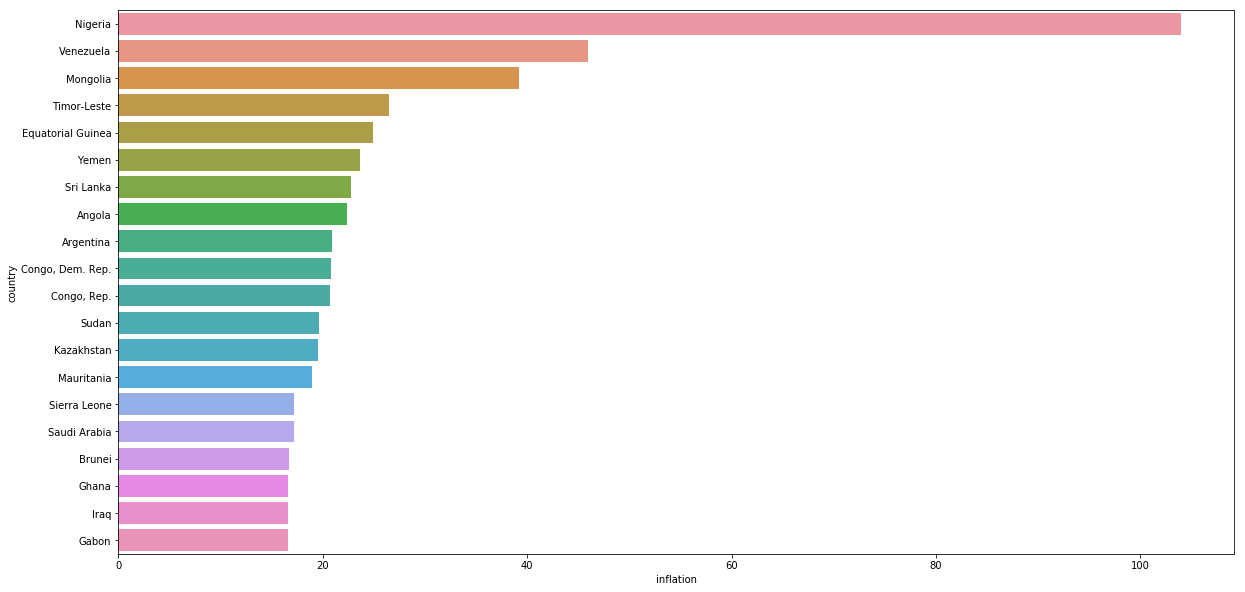

In [12]:
# Inflation :- The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (20, 10))
top20_inflation = dataframe[["country",'inflation']].sort_values('inflation', ascending = False).head(20)
plt_inflation = sns.barplot(x="inflation", y='country', data= top20_inflation)
plt.savefig('Inflation')

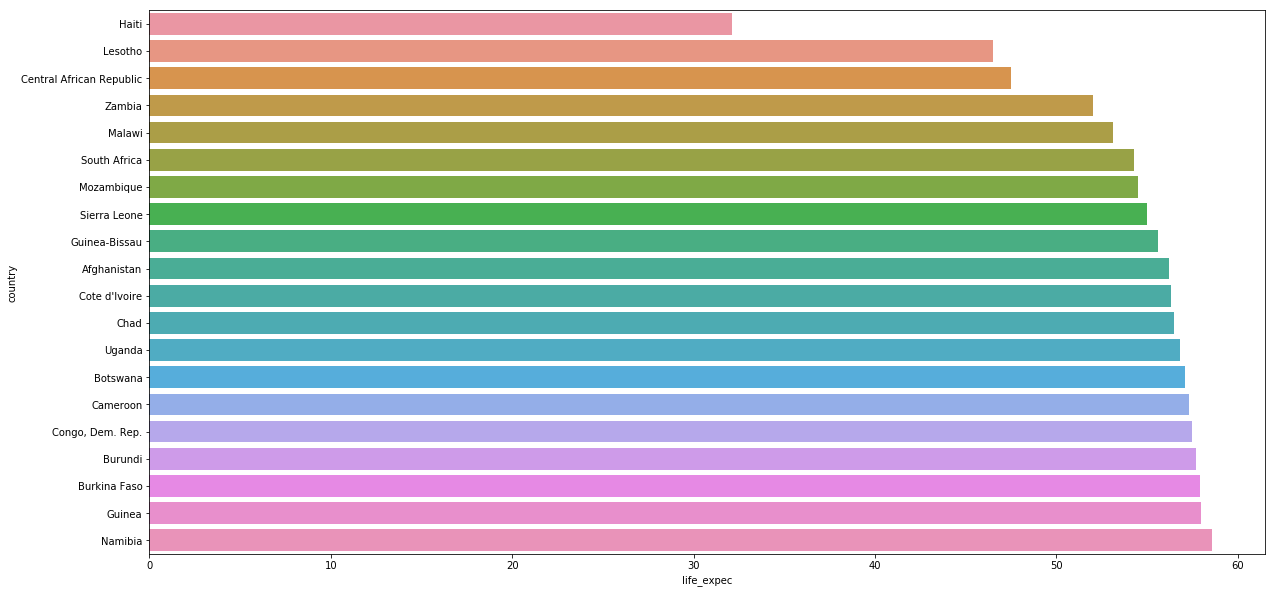

In [13]:
# Life Expectancy:- The average number of years a new born child would live if the current mortality patterns are to remain the same
plt.figure(figsize = (20, 10))
bottom20_life_expec = dataframe[["country",'life_expec']].sort_values('life_expec', ascending = True).head(20)
plt_life_expec = sns.barplot(x="life_expec", y='country', data= bottom20_life_expec)
plt.savefig('Life Expectancy')

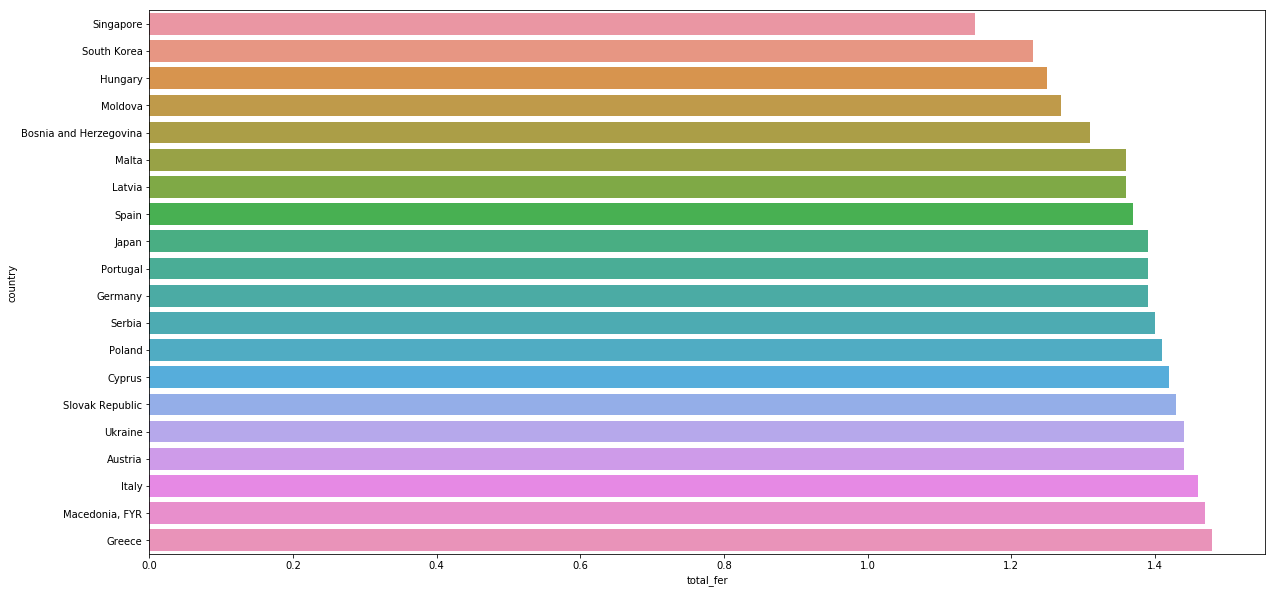

In [14]:
# Total Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (20, 10))
bottom20_total_fer = dataframe[["country",'total_fer']].sort_values('total_fer', ascending = True).head(20)
plt_total_fer = sns.barplot(x="total_fer", y='country', data= bottom20_total_fer)
plt.savefig('Total Fertility Rate')

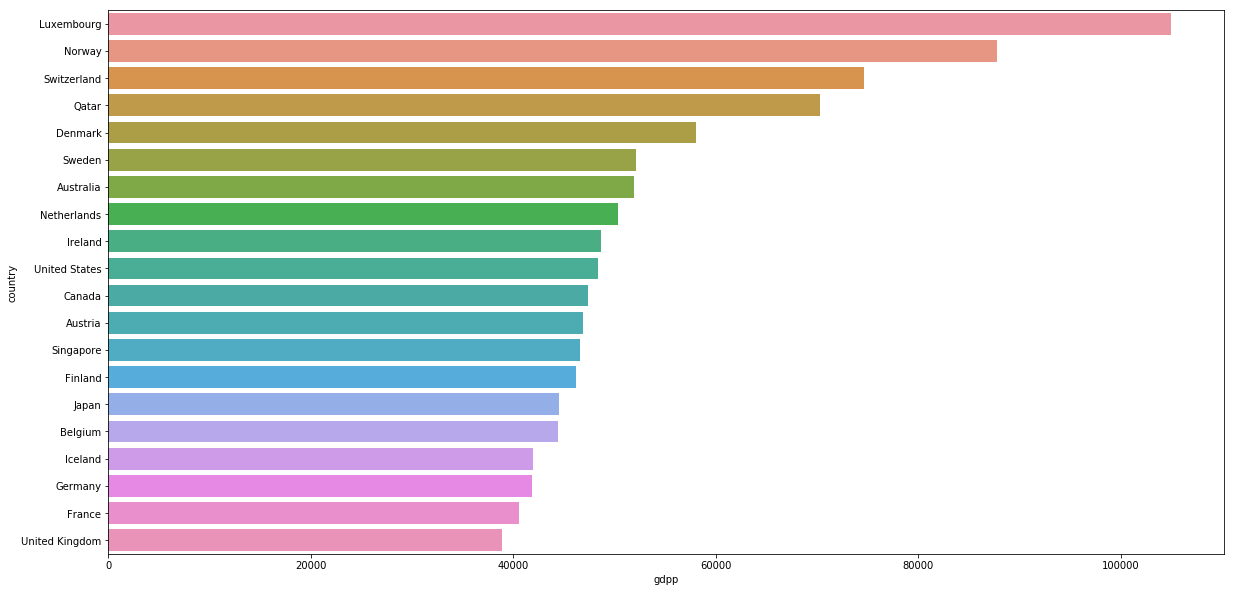

In [15]:
# GDPP :The GDP per capita. Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (20, 10))
bottom20_gdpp = dataframe[["country",'gdpp']].sort_values('gdpp', ascending = False).head(20)
plt_gdpp = sns.barplot(x="gdpp", y='country', data= bottom20_gdpp)
plt.savefig('GDPP')

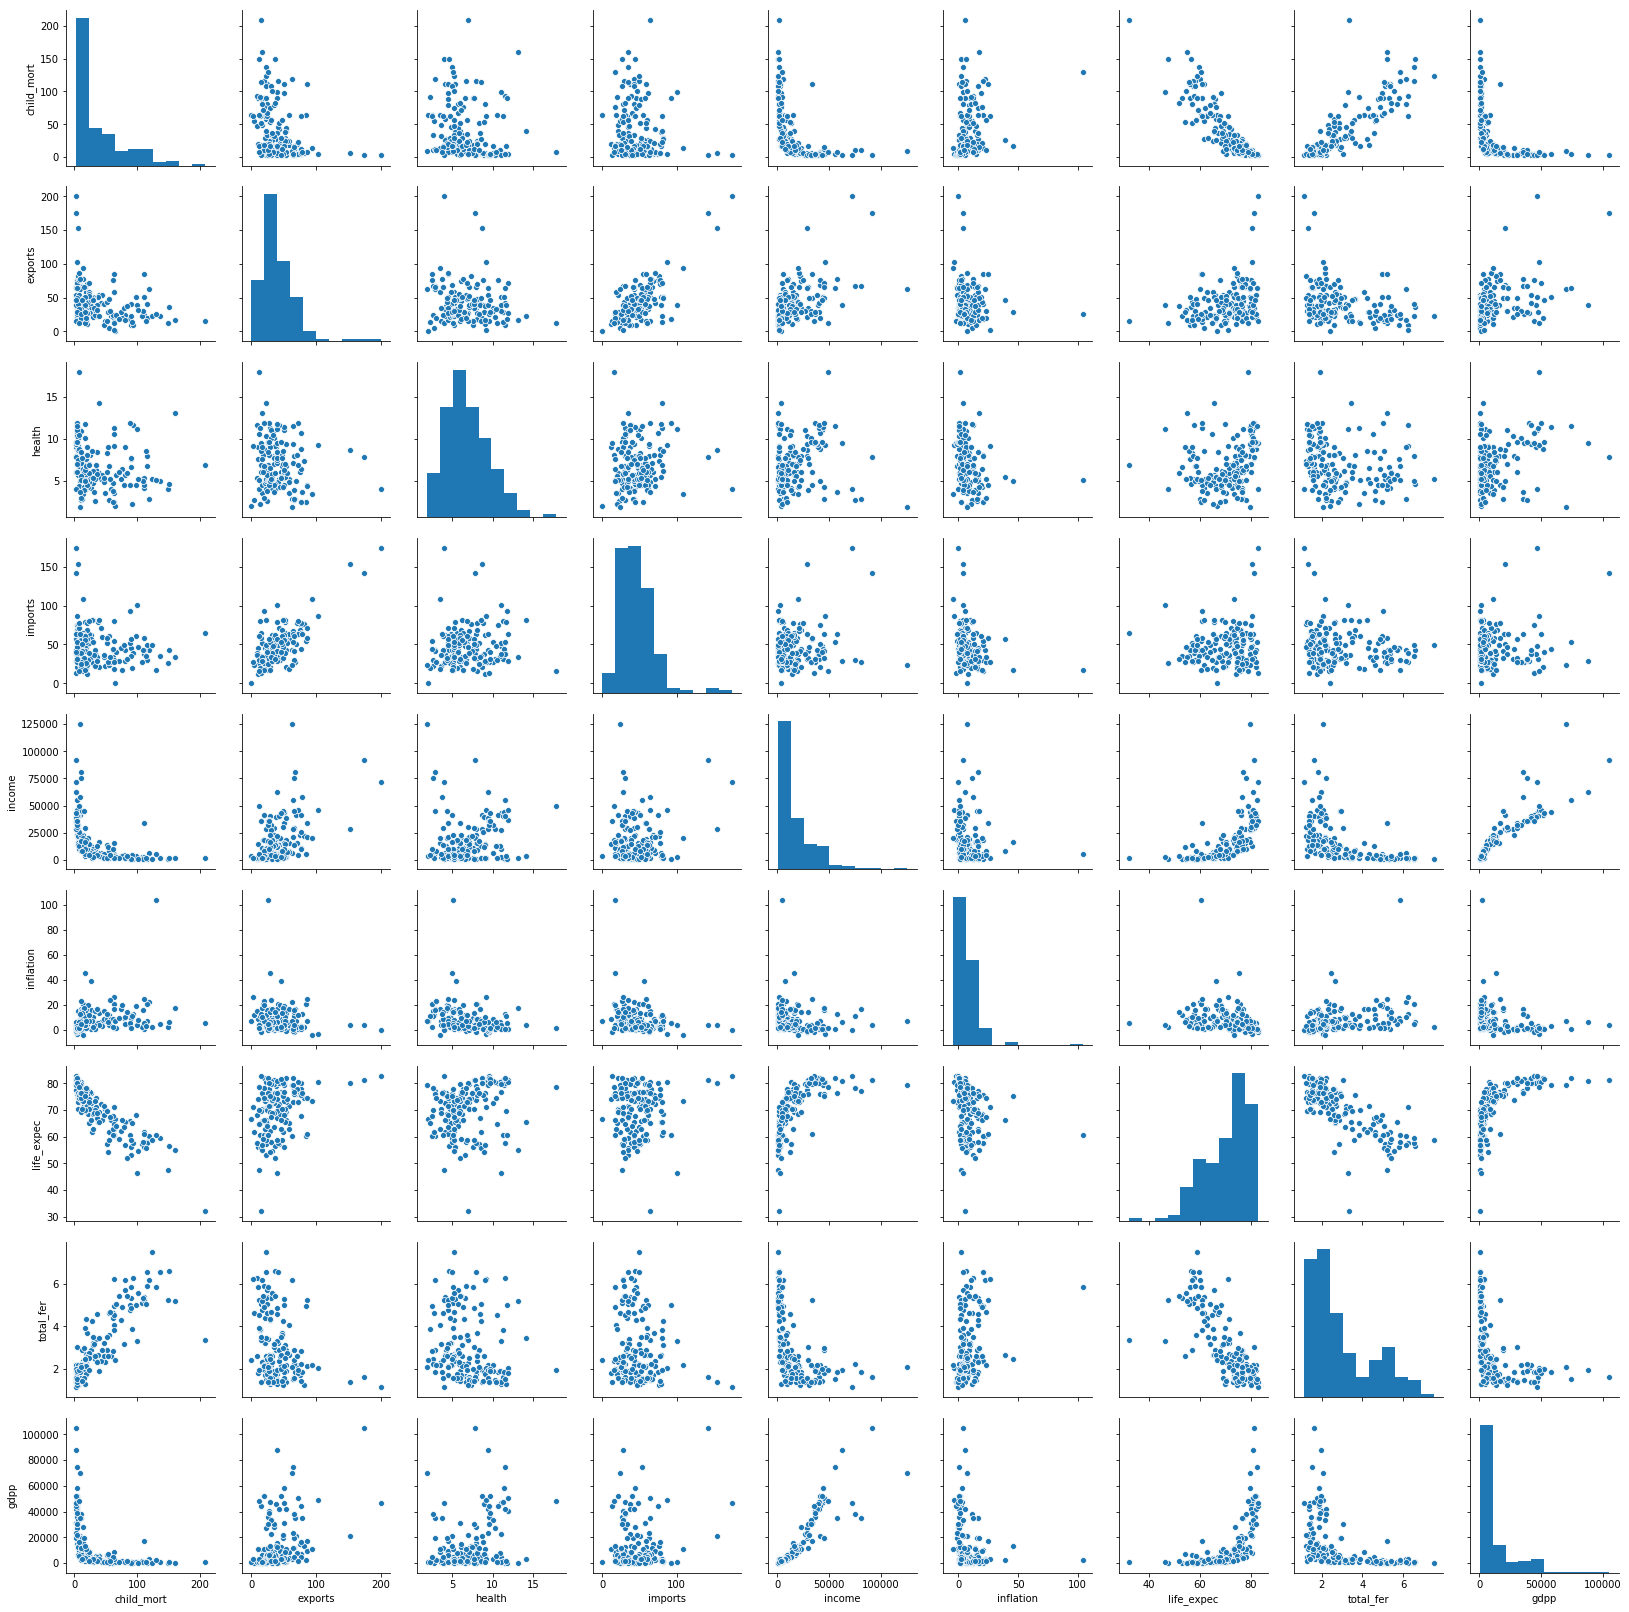

In [16]:
# Plotting the graph
sns.pairplot(dataframe)
plt.show()

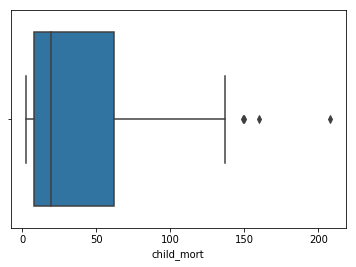

In [17]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['child_mort'])

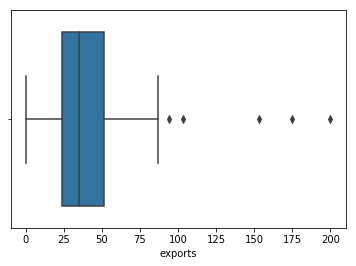

In [18]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['exports'])

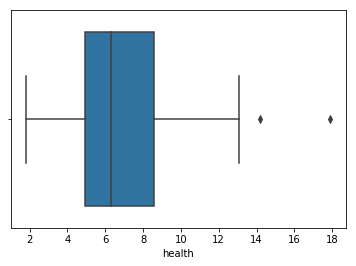

In [19]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['health'])

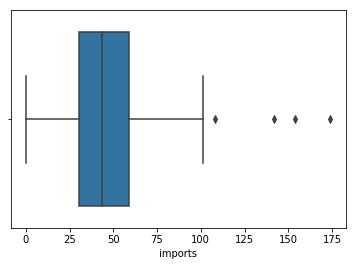

In [20]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['imports'])

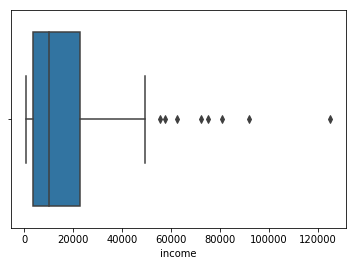

In [21]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['income'])

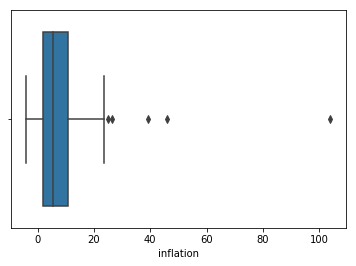

In [22]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['inflation'])

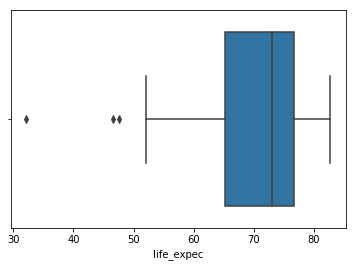

In [23]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['life_expec'])

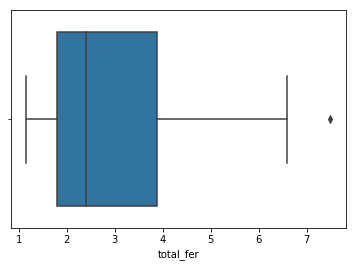

In [24]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['total_fer'])

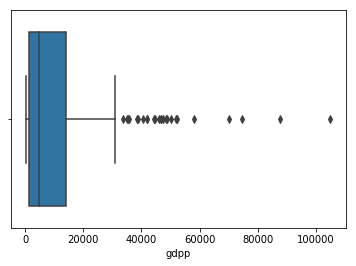

In [25]:
# Analysing the Outliers for graph
sns.boxplot(x=dataframe['gdpp'])

In [26]:
# Before performing PCA taking the backup of the data set
dataframe_backup = dataframe.copy()
dataframe_backup.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Now we need to identify the countries which are backward based on the conditions like socio-economic and health factors

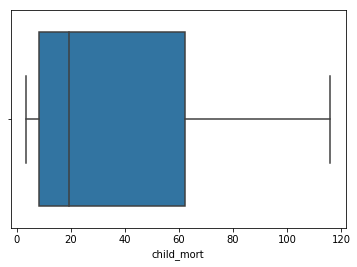

In [27]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['child_mort'].quantile([0.05,0.95]).values
dataframe_backup['child_mort'][dataframe_backup['child_mort'] <= percentiles[0]] = percentiles[0]
dataframe_backup['child_mort'][dataframe_backup['child_mort'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['child_mort'])

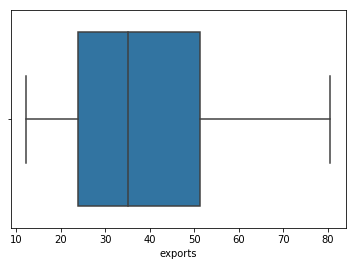

In [28]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['exports'].quantile([0.05,0.95]).values
dataframe_backup['exports'][dataframe_backup['exports'] <= percentiles[0]] = percentiles[0]
dataframe_backup['exports'][dataframe_backup['exports'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['exports'])

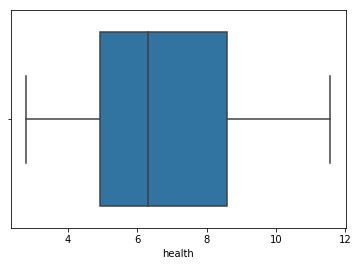

In [29]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['health'].quantile([0.05,0.95]).values
dataframe_backup['health'][dataframe_backup['health'] <= percentiles[0]] = percentiles[0]
dataframe_backup['health'][dataframe_backup['health'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['health'])

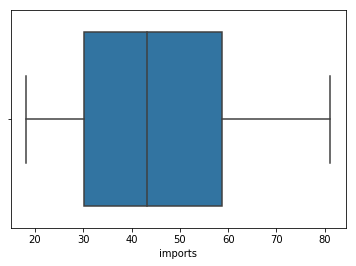

In [30]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['imports'].quantile([0.05,0.95]).values
dataframe_backup['imports'][dataframe_backup['imports'] <= percentiles[0]] = percentiles[0]
dataframe_backup['imports'][dataframe_backup['imports'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['imports'])

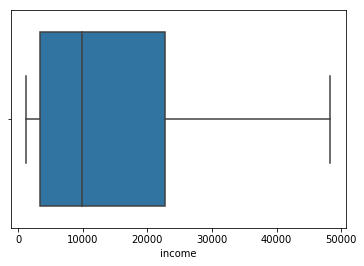

In [31]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['income'].quantile([0.05,0.95]).values
dataframe_backup['income'][dataframe_backup['income'] <= percentiles[0]] = percentiles[0]
dataframe_backup['income'][dataframe_backup['income'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['income'])

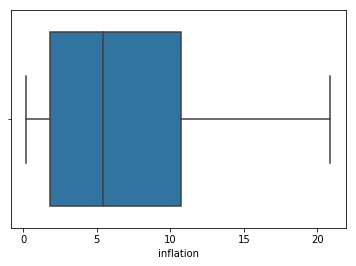

In [32]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['inflation'].quantile([0.05,0.95]).values
dataframe_backup['inflation'][dataframe_backup['inflation'] <= percentiles[0]] = percentiles[0]
dataframe_backup['inflation'][dataframe_backup['inflation'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['inflation'])

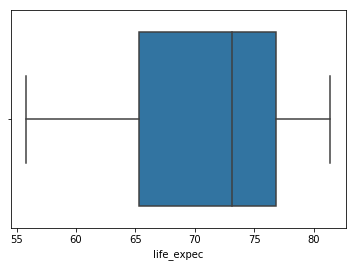

In [33]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['life_expec'].quantile([0.05,0.95]).values
dataframe_backup['life_expec'][dataframe_backup['life_expec'] <= percentiles[0]] = percentiles[0]
dataframe_backup['life_expec'][dataframe_backup['life_expec'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['life_expec'])

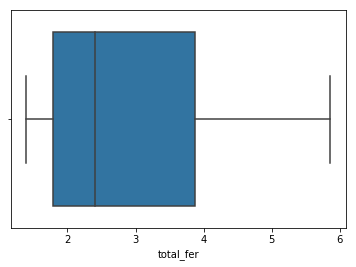

In [34]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['total_fer'].quantile([0.05,0.95]).values
dataframe_backup['total_fer'][dataframe_backup['total_fer'] <= percentiles[0]] = percentiles[0]
dataframe_backup['total_fer'][dataframe_backup['total_fer'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['total_fer'])

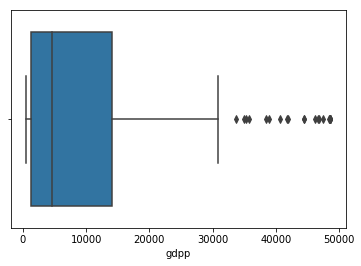

In [35]:
# Calculating the outliers and restricting to values for analysis
percentiles = dataframe_backup['gdpp'].quantile([0.05,0.95]).values
dataframe_backup['gdpp'][dataframe_backup['gdpp'] <= percentiles[0]] = percentiles[0]
dataframe_backup['gdpp'][dataframe_backup['gdpp'] >= percentiles[1]] = percentiles[1]
sns.boxplot(x=dataframe_backup['gdpp'])

Scaling the Data

In [36]:
# Creating a scaling object
scaler = StandardScaler()

# Creating a list of the variables that you needs to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Scale these variables using 'fit_transform'
dataframe_backup[varlist] = scaler.fit_transform(dataframe_backup[varlist])

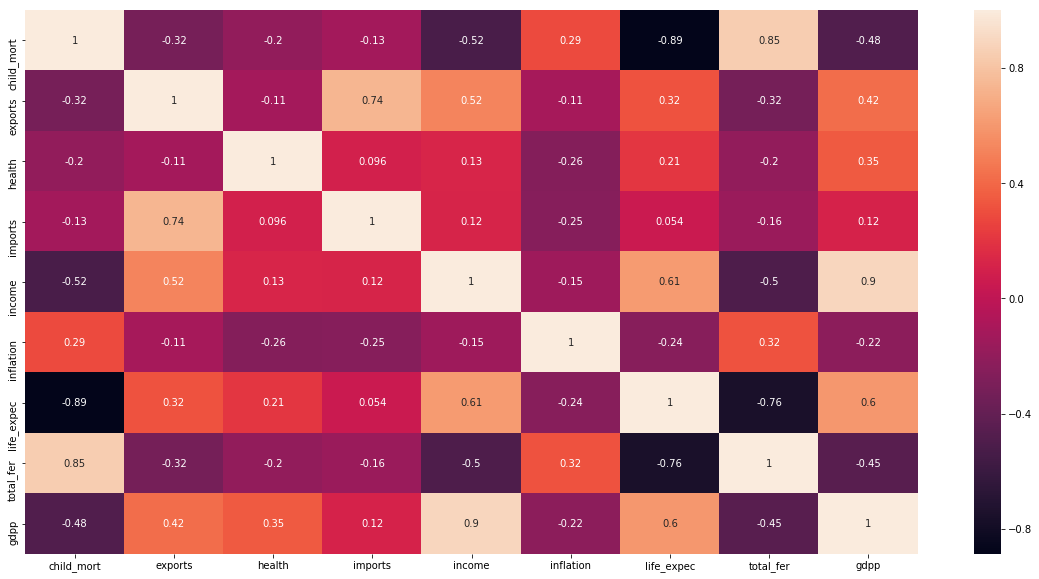

<Figure size 432x288 with 0 Axes>

In [37]:
# Finding the Correlation 

plt.figure(figsize = (20, 10))
sns.heatmap(dataframe.corr(), annot = True)
plt.show()
plt.savefig('Correlationplot')

As per the above graph, we can observe the variables which are highly correlated. Ex: income is having 0.9 with gdpp life_expec is having 0.6 with gdpp. 0.76 with total_fer etc... gdpp with child_mort with -0.48, inflation -0.24 with life_expec etc... So, now we will remove all there correlations or reduce correlations using PCA

PCA on Data

In [38]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [40]:
# Mapping feature variable to X
X = dataframe_backup.drop(['country'],axis=1)

# Mapping response variable to y
y = dataframe_backup['country']

In [41]:
# Performing PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

- Plotting Principal Components and lets understand from output
- Lets plot the two principal components

In [42]:
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [43]:
colnames = list(X.columns)
pcs_dataframe = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_dataframe.head()

,PC1,PC2,Feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income


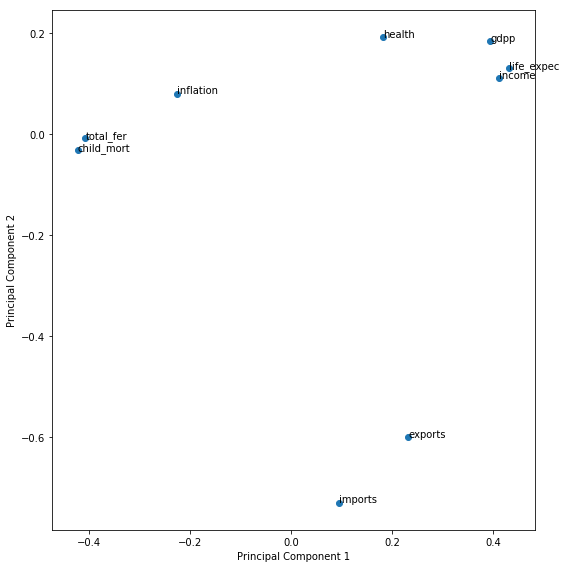

In [46]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_dataframe.PC1, pcs_dataframe.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_dataframe.Feature):
    plt.annotate(txt, (pcs_dataframe.PC1[i],pcs_dataframe.PC2[i]))
plt.tight_layout()
plt.show()

In [47]:
#Analysing variance ratio
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

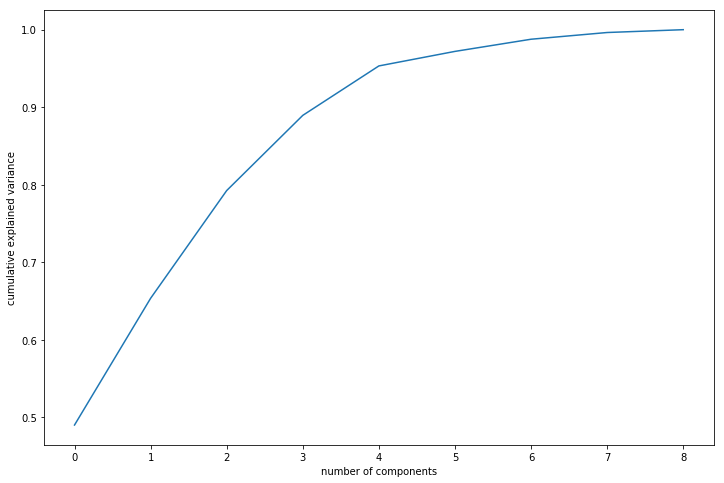

In [48]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [49]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)

In [55]:
dataframe_pca = pca_final.fit_transform(X)
dataframe_pca.shape

(167, 4)

In [56]:
dataframe_pca = pd.DataFrame(df_pca)
dataframe_pca.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [57]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(dataframe_pca.transpose())

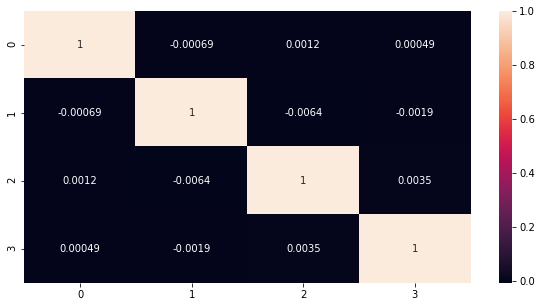

In [50]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

As per the above graph, we can undrstand that there is very minimal correlation which is good

In [58]:
dataframe_pca.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


# Outlier Analysis post PC's creation

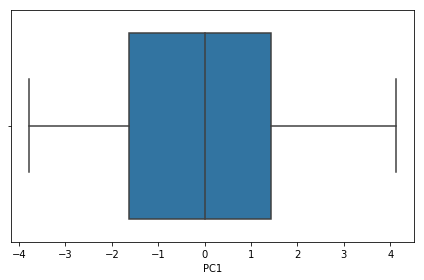

In [59]:
#As per problem statement, We need to since it was asked to take 1st 2 PC components, analaysing PC1:0 and PC2:1 component
sns.boxplot(dataframe_pca[0])
plt.tight_layout()
plt.xlabel("PC1")
plt.show()

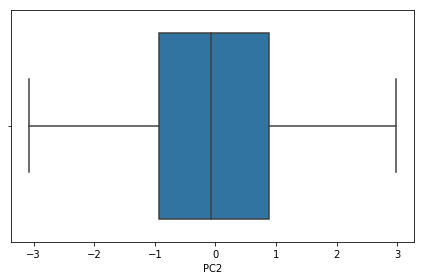

In [60]:
sns.boxplot(dataframe_pca[1])
plt.tight_layout()
plt.xlabel("PC2")
plt.show()

As per the above graph of PC1 and PC2, Since there are no outliers identified. Hence skipping outlier treatment

# Modeling using KMeans

In [61]:
#Finding cluster tendency using Hopkin statistics
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [62]:
from sklearn.neighbors import NearestNeighbors
hopkins(dataframe_pca)

0.7440602691994374

Here it is around 0.74 which is having high chances of cluster tendency

In [63]:
#Randomly assigning 4 clusters and fitting the model
#Also taking copy of df_pca, since pca df has to be used for hierarchal clustering
dataframe_pca_kmeans = dataframe_pca.copy()
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dataframe_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
len(kmeans.labels_)

167

# Finding the optimal number of clusters

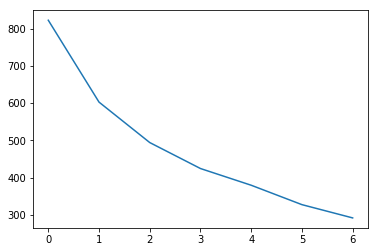

In [66]:
#elbow-curve/SSD
ssd = [] #sum of square distance
range_n_cluster = [2, 3, 4, 5,6,7,8]
for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataframe_pca_kmeans)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)
plt.show()

- As per the above graph we can conclude that after cluster index 1 (after 3 clusters there is no much signficance drop)
- Hence we consider 3 clusters. 
- But still will analyse Silhouette Score. On that basis we can consider no of clusters

# Silhouette Score Analysis

In [67]:
range_n_cluster = [2, 3, 4, 5,6,7,8]
for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataframe_pca_kmeans)
    cluster_labesl = kmeans.labels_
    sihoutte_avg = silhouette_score(dataframe_pca, cluster_labesl)
    print("For n_cluster={0}, the silhouette score is {1}".format(num_clusters, sihoutte_avg))

For n_cluster=2, the silhouette score is 0.3250564127058999
For n_cluster=3, the silhouette score is 0.32172840937043035
For n_cluster=4, the silhouette score is 0.30719758172454154
For n_cluster=5, the silhouette score is 0.3103393067970681
For n_cluster=6, the silhouette score is 0.29308544727525865
For n_cluster=7, the silhouette score is 0.30580446465341654
For n_cluster=8, the silhouette score is 0.30103086095362364


As per the above info though cluster 8 has higher score, by considering elbow curve, taking cluster 3 on avg

In [69]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(dataframe_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
#Assign the label for cluster
dataframe_pca_kmeans['cluster_id']=kmeans.labels_
dataframe_pca_kmeans.head()

,0,1,2,3,cluster_id
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,2
2,-0.447318,-0.424388,1.832563,-0.622794,2
3,-3.359135,1.259644,1.980609,1.750224,0
4,1.244074,0.697703,-0.269676,-0.771221,2


In [75]:
#As per problem statement we will consider first 2 pc components i.e PC1:0 and PC2:1
dataframe_pca_kmeans_2_pcs = dataframe_pca_kmeans[[0, 1, 'cluster_id']]
dataframe_pca_kmeans_2_pcs.head()

,0,1,cluster_id
0,-3.275720,-0.427284,0
1,0.483960,-0.161179,2
2,-0.447318,-0.424388,2
3,-3.359135,1.259644,0
4,1.244074,0.697703,2


In [76]:
dataframe_pca_kmeans_2_pcs['country']=dataframe['country']

In [77]:
dataframe_pca_kmeans_2_pcs.head()

,0,1,cluster_id,country
0,-3.275720,-0.427284,0,Afghanistan
1,0.483960,-0.161179,2,Albania
2,-0.447318,-0.424388,2,Algeria
3,-3.359135,1.259644,0,Angola
4,1.244074,0.697703,2,Antigua and Barbuda


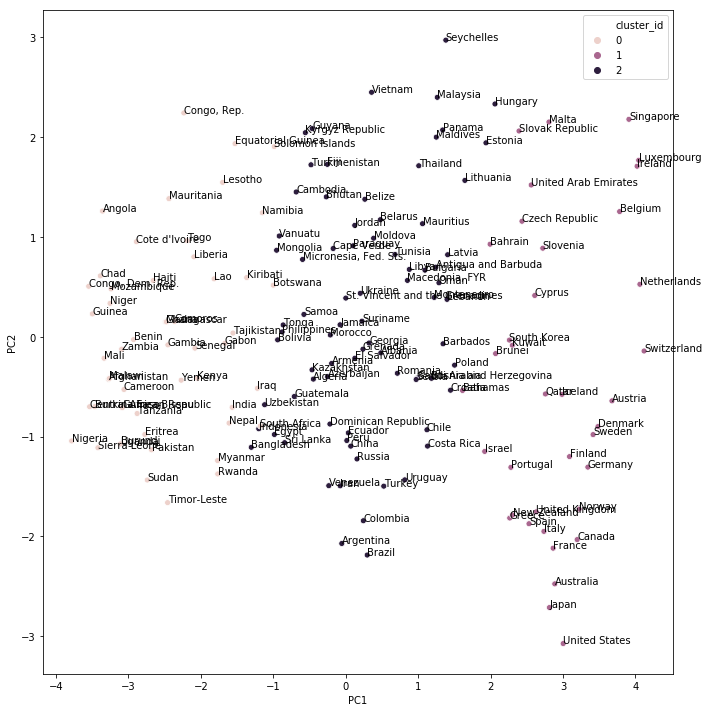

In [79]:
#Visualising pc1 and pc2 with countries and cluster Ids
fig = plt.figure(figsize = (10,10))
sns.scatterplot( x=dataframe_pca_kmeans_2_pcs[0], y=dataframe_pca_kmeans_2_pcs[1], data=dataframe_pca_kmeans_2_pcs, hue='cluster_id')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(dataframe_pca_kmeans_2_pcs.country):
    plt.annotate(txt, (dataframe_pca_kmeans_2_pcs[0][i],dataframe_pca_kmeans_2_pcs[1][i]))
plt.tight_layout()
plt.show()

Note:- Cluster Id's allignments are varying each time its executed
As per the above graph, that left most, side countries like Nigeria, Congo etc are extremly under developed countries with cluster0. But where as Colombia, Brazi etc has better economy compared to previous countries with cluster1 in middle of graph. Countries like United states, Switzerland, Australia, Austria etc are right aligned with high economy with cluster 1

In [80]:
dataframe_pca_kmeans_2_pcs['gdpp'] = dataframe['gdpp']
dataframe_pca_kmeans_2_pcs['child_mort'] = dataframe['child_mort']
dataframe_pca_kmeans_2_pcs['income'] = dataframe['income']

# Calculating the mean of gdpp, income and child_mort by grouping cluster id

In [81]:
dataframe_gdpp_mean = pd.DataFrame(dataframe_pca_kmeans_2_pcs.groupby(['cluster_id']).gdpp.mean())
dataframe_gdpp_mean = dataframe_gdpp_mean.reset_index()

In [82]:
dataframe_child_mort_mean = pd.DataFrame(dataframe_pca_kmeans_2_pcs.groupby(['cluster_id']).child_mort.mean())
dataframe_child_mort_mean = dataframe_child_mort_mean.reset_index()

In [83]:
dataframe_income_mean = pd.DataFrame(dataframe_pca_kmeans_2_pcs.groupby(['cluster_id']).income.mean())
dataframe_income_mean = dataframe_income_mean.reset_index()

In [84]:
dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==0].head(20)

,0,1,cluster_id,country,gdpp,child_mort,income
0,-3.275720,-0.427284,0,Afghanistan,553,90.2,1610
3,-3.359135,1.259644,0,Angola,3530,119.0,5900
17,-2.929756,-0.028483,0,Benin,758,111.0,1820
21,-1.000969,0.516724,0,Botswana,6350,52.5,13300
25,-3.468154,-0.701102,0,Burkina Faso,575,116.0,1430
26,-3.099530,-1.067768,0,Burundi,231,93.6,764
28,-3.062069,-0.528265,0,Cameroon,1310,108.0,2660
31,-3.536729,-0.701189,0,Central African Republic,446,149.0,888
32,-3.388699,0.610173,0,Chad,897,150.0,1930
36,-2.364786,0.153455,0,Comoros,769,88.2,1410


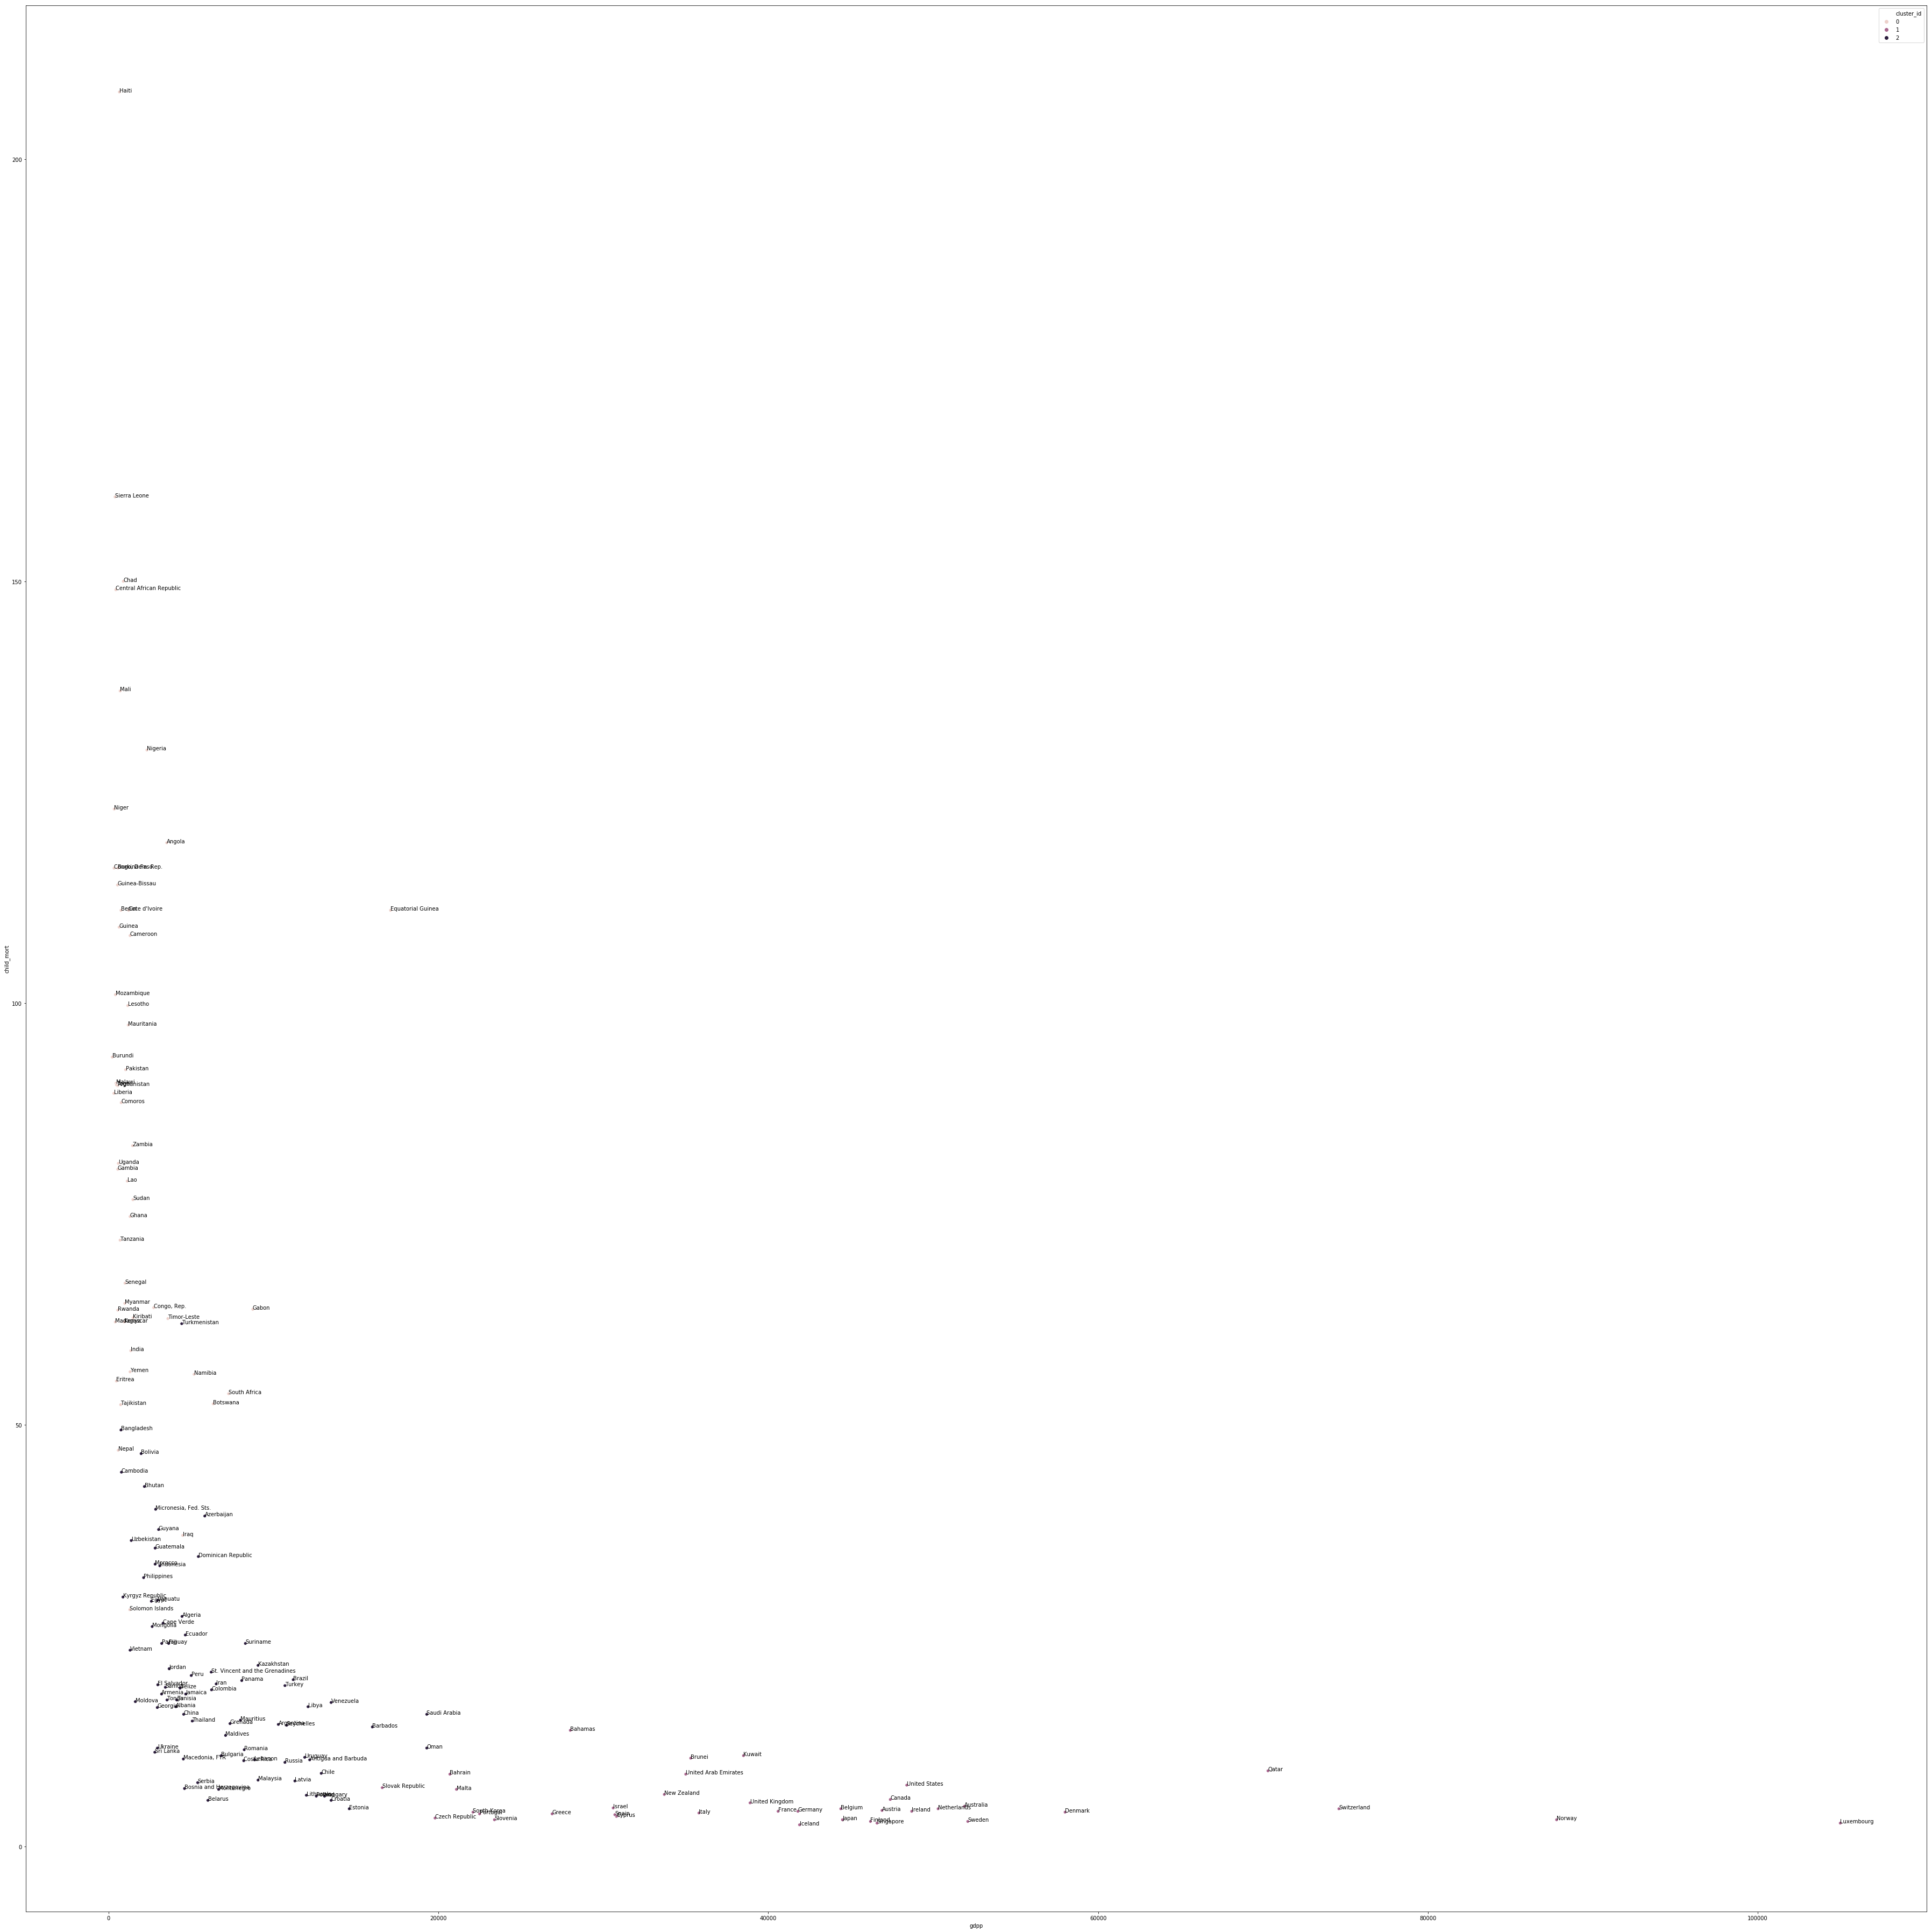

<Figure size 432x288 with 0 Axes>

In [85]:
#Scatter plot of countries with gdpp and child_mort along with clusters
fig = plt.figure(figsize = (50,50))
sns.scatterplot( x=dataframe_pca_kmeans_2_pcs['gdpp'], y=dataframe_pca_kmeans_2_pcs['child_mort'], data=dataframe_pca_kmeans_2_pcs, hue='cluster_id')
plt.xlabel('gdpp')
plt.ylabel('child_mort')
for i, txt in enumerate(dataframe_pca_kmeans_2_pcs.country):
    plt.annotate(txt, (dataframe_pca_kmeans_2_pcs['gdpp'][i],dataframe_pca_kmeans_2_pcs['child_mort'][i]))
plt.tight_layout()
plt.show()

plt.savefig('Cluster_GDPP-C_mort')

As per above graph, Haiti is country having low gdpp and high child_mort rate which is in cluster 0.
Where as Luxembourg is having high gdpp and low child_mort which is cluster 1

# Plotting clusters and comparing with gdpp, child_mort and income

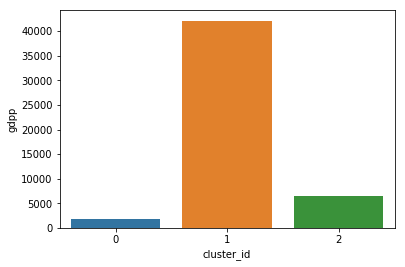

In [86]:
#Analysing based on gdpp
sns.barplot(x=dataframe_gdpp_mean.cluster_id, y=dataframe_gdpp_mean.gdpp)
plt.show()

In [87]:
print("Cluster 0 developing countries: "+ str(len(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==0])))
print("Cluster 1 developed countries: " + str(len(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==1])))
print("Cluster 2 under developed countries: " + str(len(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==2])))

Cluster 0 developing countries: 52
Cluster 1 developed countries: 37
Cluster 2 under developed countries: 78


As per the above graph, we can understand that under developed countries are clustered under cluster 0 based on gdpp Which is having below countries

In [88]:
dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==0].head(20)

,0,1,cluster_id,country,gdpp,child_mort,income
0,-3.275720,-0.427284,0,Afghanistan,553,90.2,1610
3,-3.359135,1.259644,0,Angola,3530,119.0,5900
17,-2.929756,-0.028483,0,Benin,758,111.0,1820
21,-1.000969,0.516724,0,Botswana,6350,52.5,13300
25,-3.468154,-0.701102,0,Burkina Faso,575,116.0,1430
26,-3.099530,-1.067768,0,Burundi,231,93.6,764
28,-3.062069,-0.528265,0,Cameroon,1310,108.0,2660
31,-3.536729,-0.701189,0,Central African Republic,446,149.0,888
32,-3.388699,0.610173,0,Chad,897,150.0,1930
36,-2.364786,0.153455,0,Comoros,769,88.2,1410


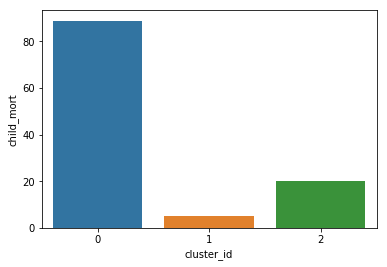

In [89]:
#Analysing based on child_mort
sns.barplot(x=dataframe_child_mort_mean.cluster_id, y=dataframe_child_mort_mean.child_mort)
plt.show()

As per the above graph we can clearly say that Cluster 0 countries which are under developed have high child_mort rate

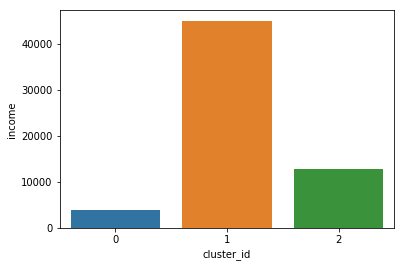

In [90]:
#Analysing based on income
sns.barplot(x=dataframe_income_mean.cluster_id, y=dataframe_income_mean.income)
plt.show()

- As per the above graph it indicates that cluster 0 countries which are developed countries are haveing high income rate, where cluster 1 has low income rate which are having underdeveloped countries
- We can clearly say that underdeveloped countries are categoriesed under cluster 1 based on gdpp, income and child mort

In [91]:
#Final list of countries which are under developed are under cluster 2 with below list using k means
print(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==0].country.values)
print(len(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==0].country.values))

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']
52


There are 79 under developed countries under cluster 0

In [92]:
#Final list of developed countries in cluster 1
print(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==1].country.values)
print(len(dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==1].country.values))

['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']
37


There are 51 developed countries under cluster 1

# Identifying the top 5 countries from cluster 0, of underdeveloped countries

In [93]:
new_kmeans_data = dataframe_pca_kmeans_2_pcs[dataframe_pca_kmeans_2_pcs.cluster_id==0]

In [94]:
#Sorting the countries based on low gdpp, high child_mort, low income
new_kmeans_data = new_kmeans_data.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True])

In [95]:
new_kmeans_data.head()

,0,1,cluster_id,country,gdpp,child_mort,income
26,-3.099530,-1.067768,0,Burundi,231,93.6,764
88,-2.096858,0.801032,0,Liberia,327,89.3,700
37,-3.549218,0.506206,0,"Congo, Dem. Rep.",334,116.0,609
112,-3.254409,0.334593,0,Niger,348,123.0,814
132,-3.422051,-1.112147,0,Sierra Leone,399,160.0,1220


In [96]:
new_kmeans_data['country'].head()

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

Top 5 countries which require immediate aid
- Bangladesh
- Cambodia
- Kyrgyz Republic.
- Solomon Islands
- Vietnam

# Hierarchical Clustering

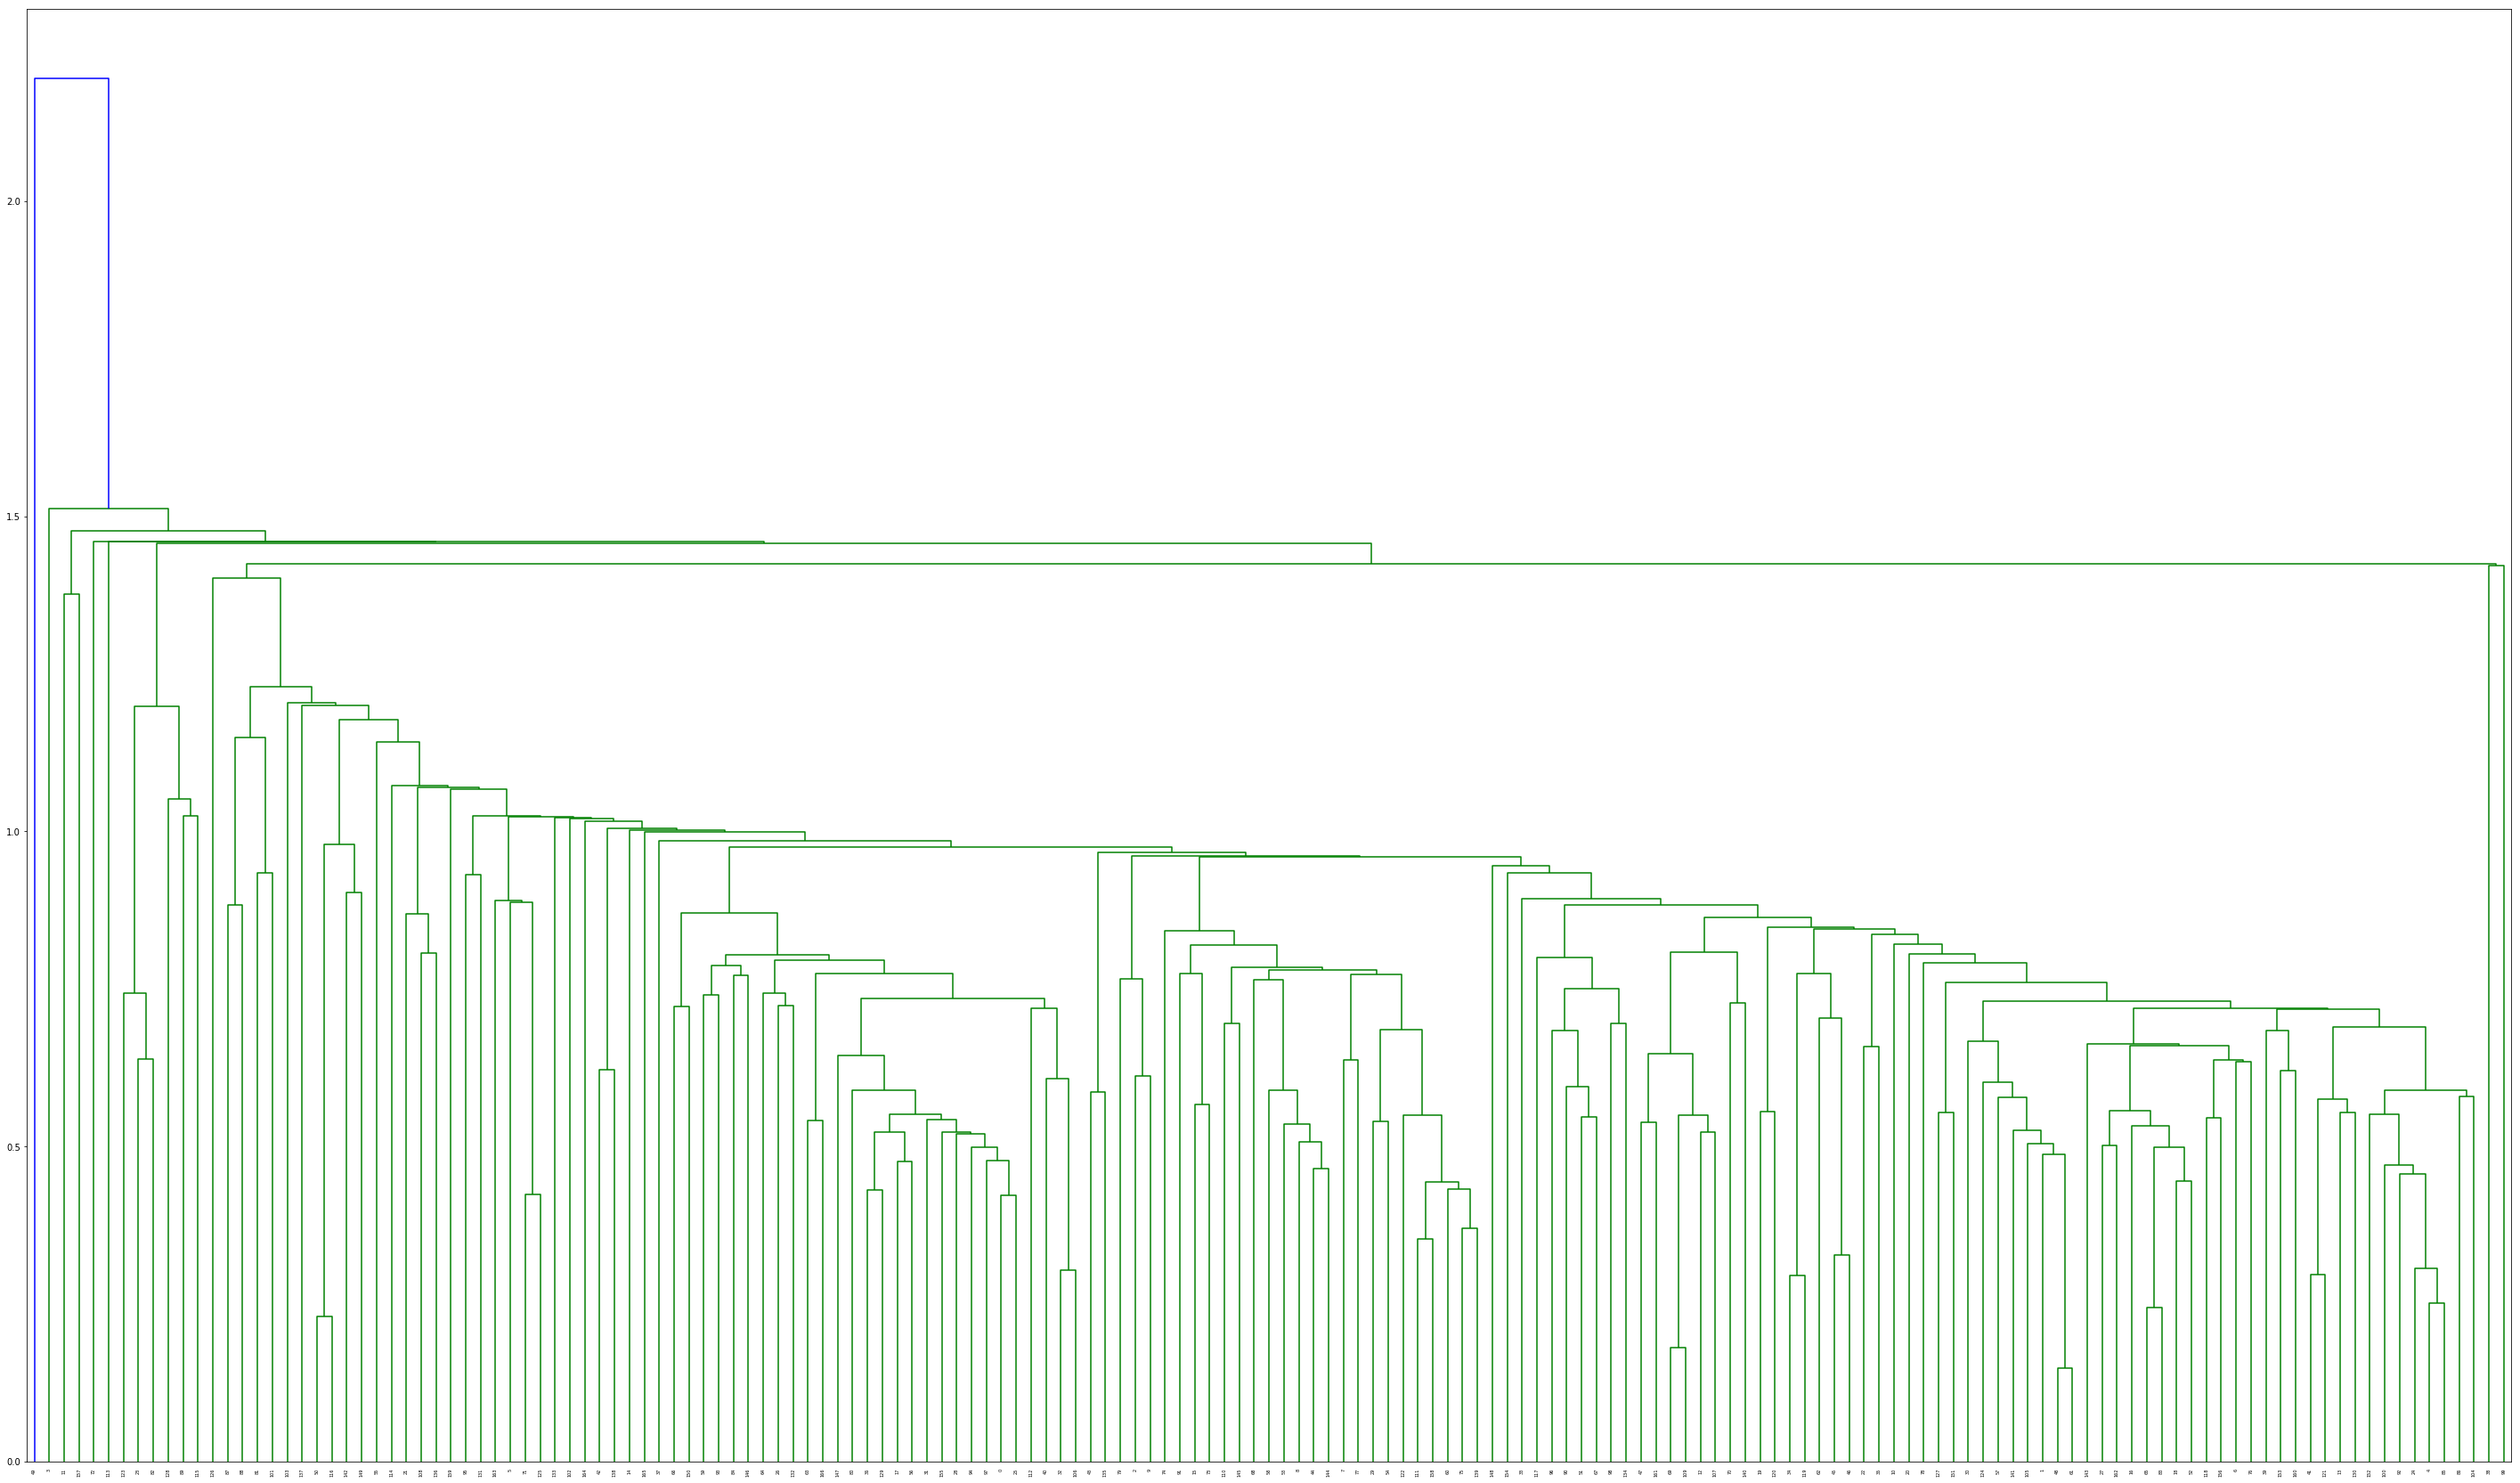

In [97]:
# Hierarchical clustering with single linkage
fig = plt.figure(figsize = (50,30))
mergings = linkage(dataframe_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

As per the above graph it is clear that number of optimal clusters are 2

In [98]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))
dataframe_pca_hc = pd.concat([dataframe_pca, clusterCut], axis=1)
dataframe_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
dataframe_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,0
2,-0.447318,-0.424388,1.832563,-0.622794,0
3,-3.359135,1.259644,1.980609,1.750224,0
4,1.244074,0.697703,-0.269676,-0.771221,0


In [99]:
# Finding the length
len(dataframe_pca_hc[dataframe_pca_hc['ClusterID']==0])

166

In [100]:
pca_cluster_hc = pd.concat([dataframe['country'],dataframe_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,0
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,0
3,Angola,-3.359135,1.259644,1.980609,1.750224,0
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,0


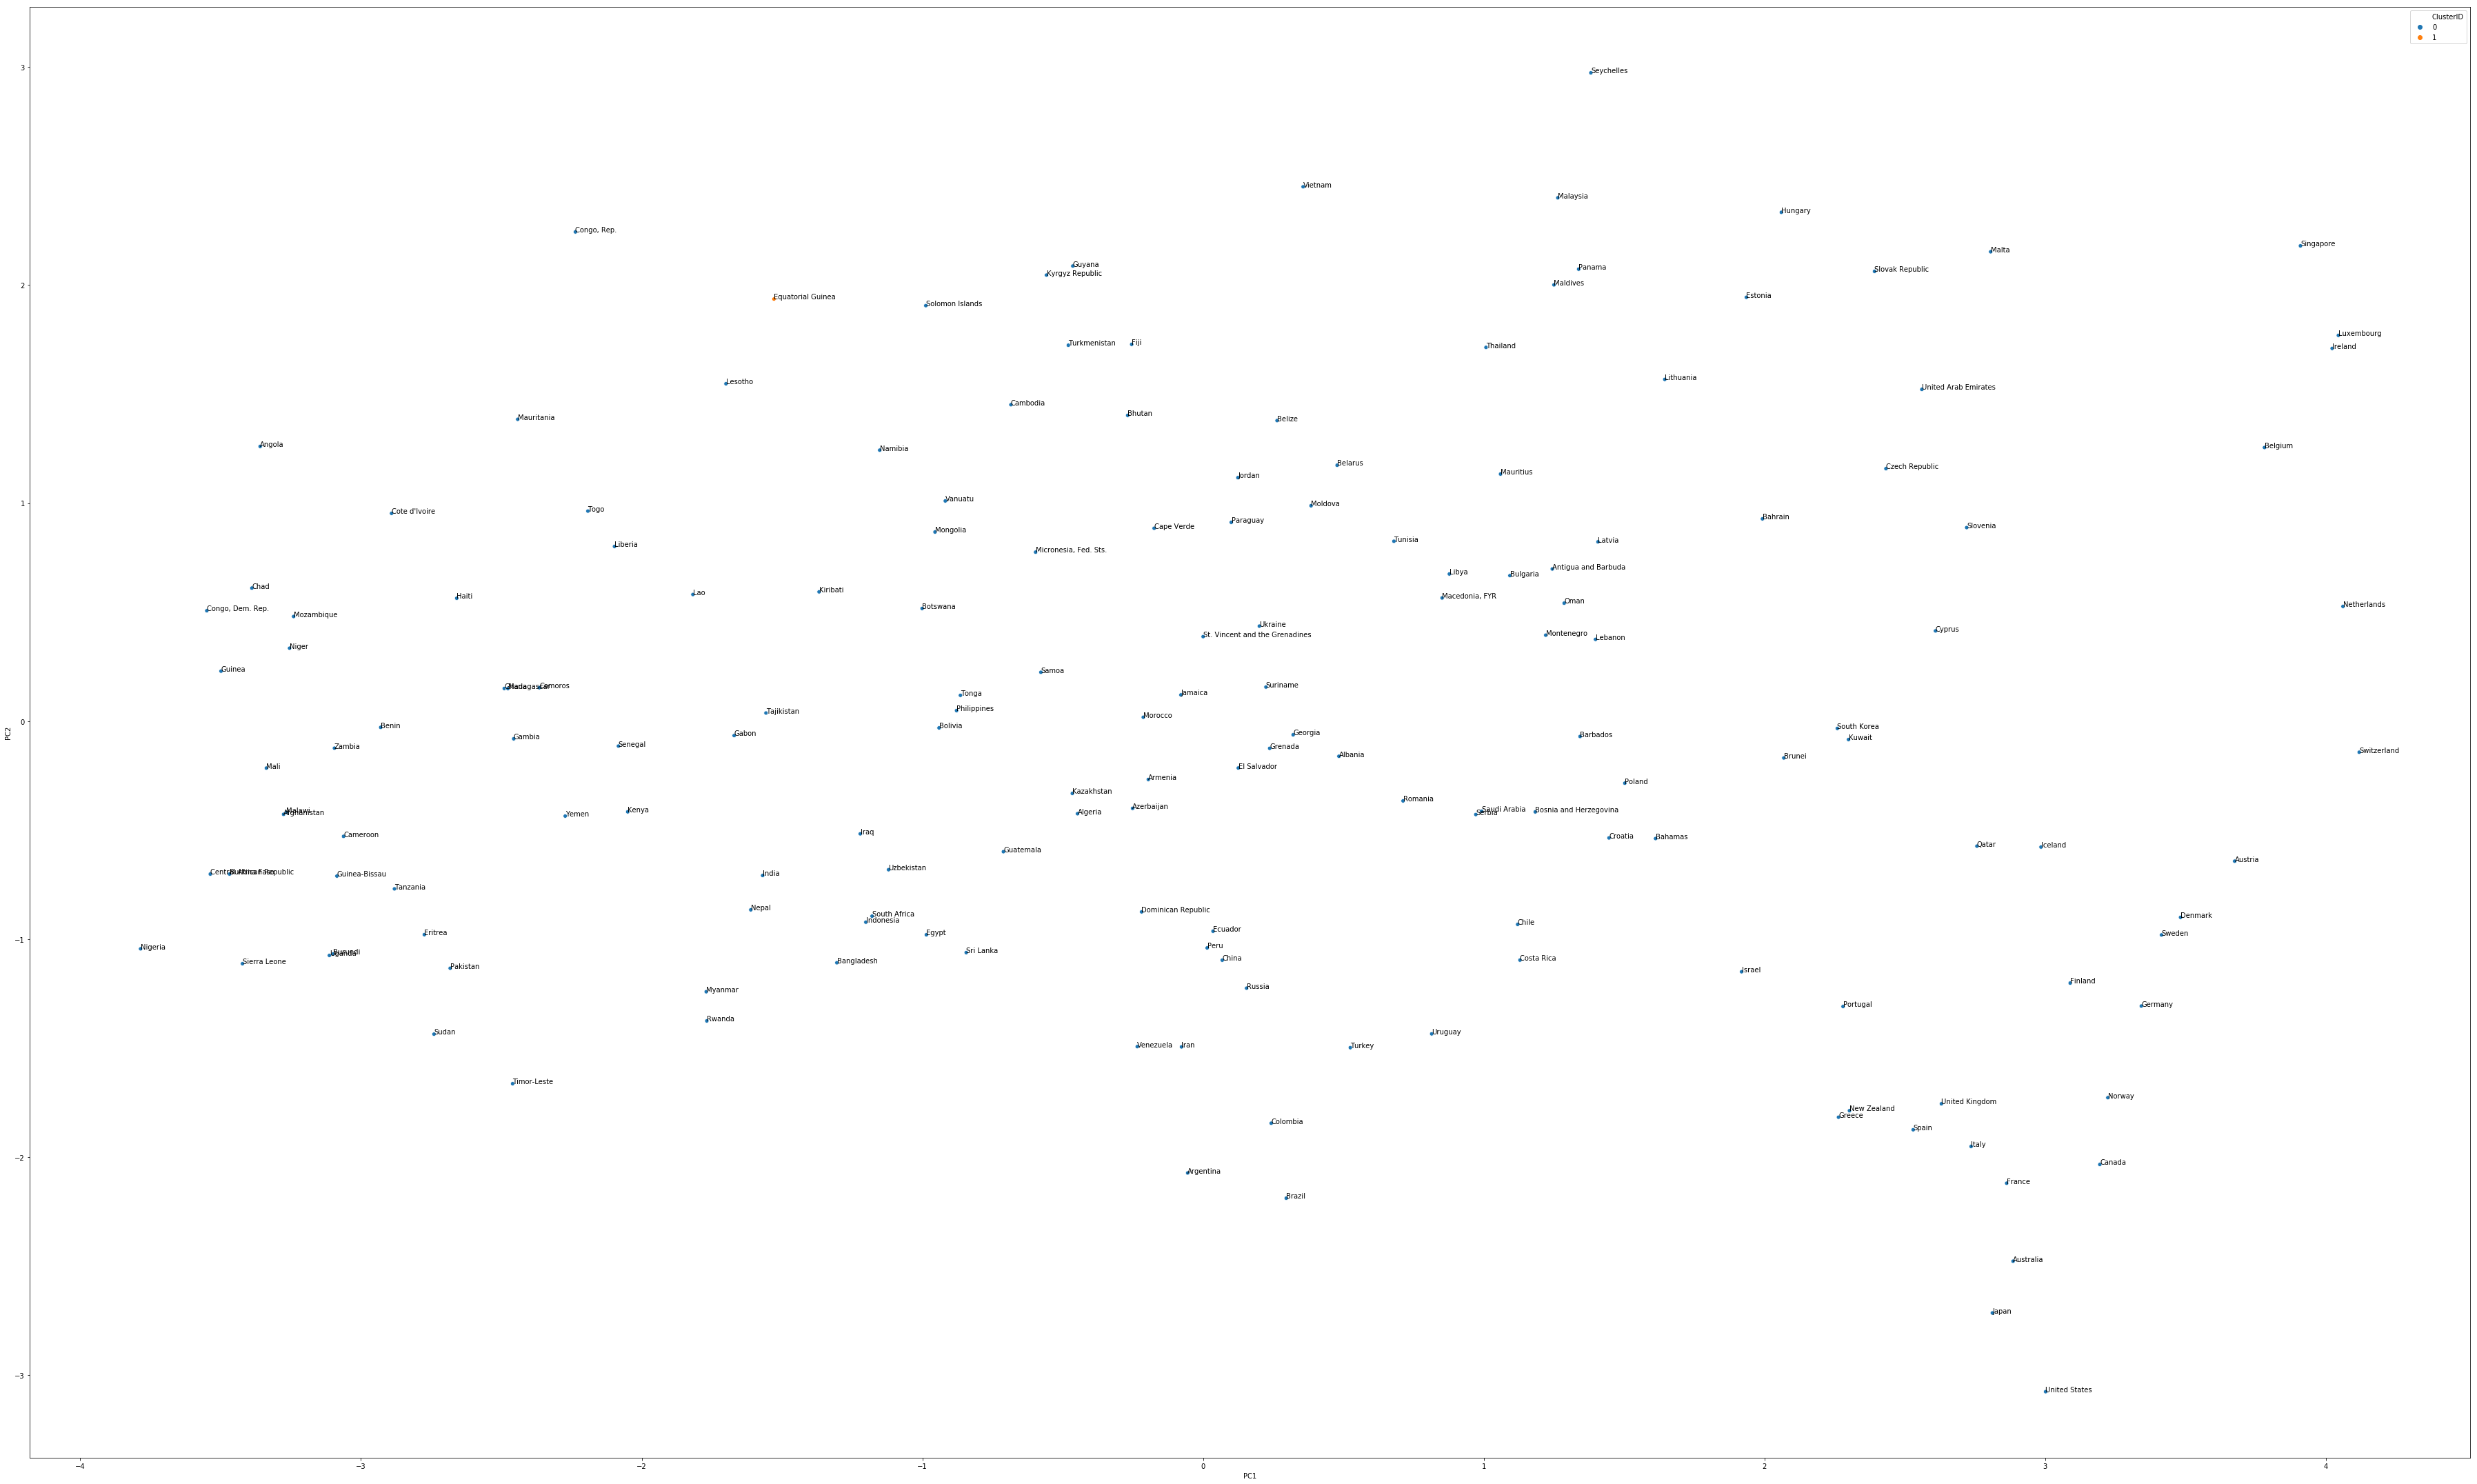

In [105]:
#Scatter plot of countries with PC1 and PC2 with clusters
fig = plt.figure(figsize = (50,30))
sns.scatterplot( x=pca_cluster_hc['PC1'], y=pca_cluster_hc['PC2'], data=pca_cluster_hc, hue='ClusterID', legend='full')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(pca_cluster_hc.country):
    plt.annotate(txt, (pca_cluster_hc['PC1'][i],pca_cluster_hc['PC2'][i]))
plt.tight_layout()
plt.show()

There only one country in cluster 1 and rest all in cluster 0

In [106]:
#As per problem statement, we need first 2 PC components
clustered_data_hc = pca_cluster_hc[['country','ClusterID', 'PC1', 'PC2']].merge(dataframe, on = 'country')
clustered_data_hc.head()

,country,ClusterID,PC1,PC2,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,-3.275720,-0.427284,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,0.483960,-0.161179,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0,-0.447318,-0.424388,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,-3.359135,1.259644,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,1.244074,0.697703,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [107]:
hc_clusters_child_mort = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [108]:
dataframe1 = pd.concat([pd.Series(list(range(0,2))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
dataframe1.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
dataframe1.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,37.831928,40.839753,6.829759,46.817867,17044.957831,7.678711,70.613855,2.934337,12939.240964
1,1,111.000000,85.800000,4.480000,58.900000,33700.000000,24.900000,60.900000,5.210000,17100.000000


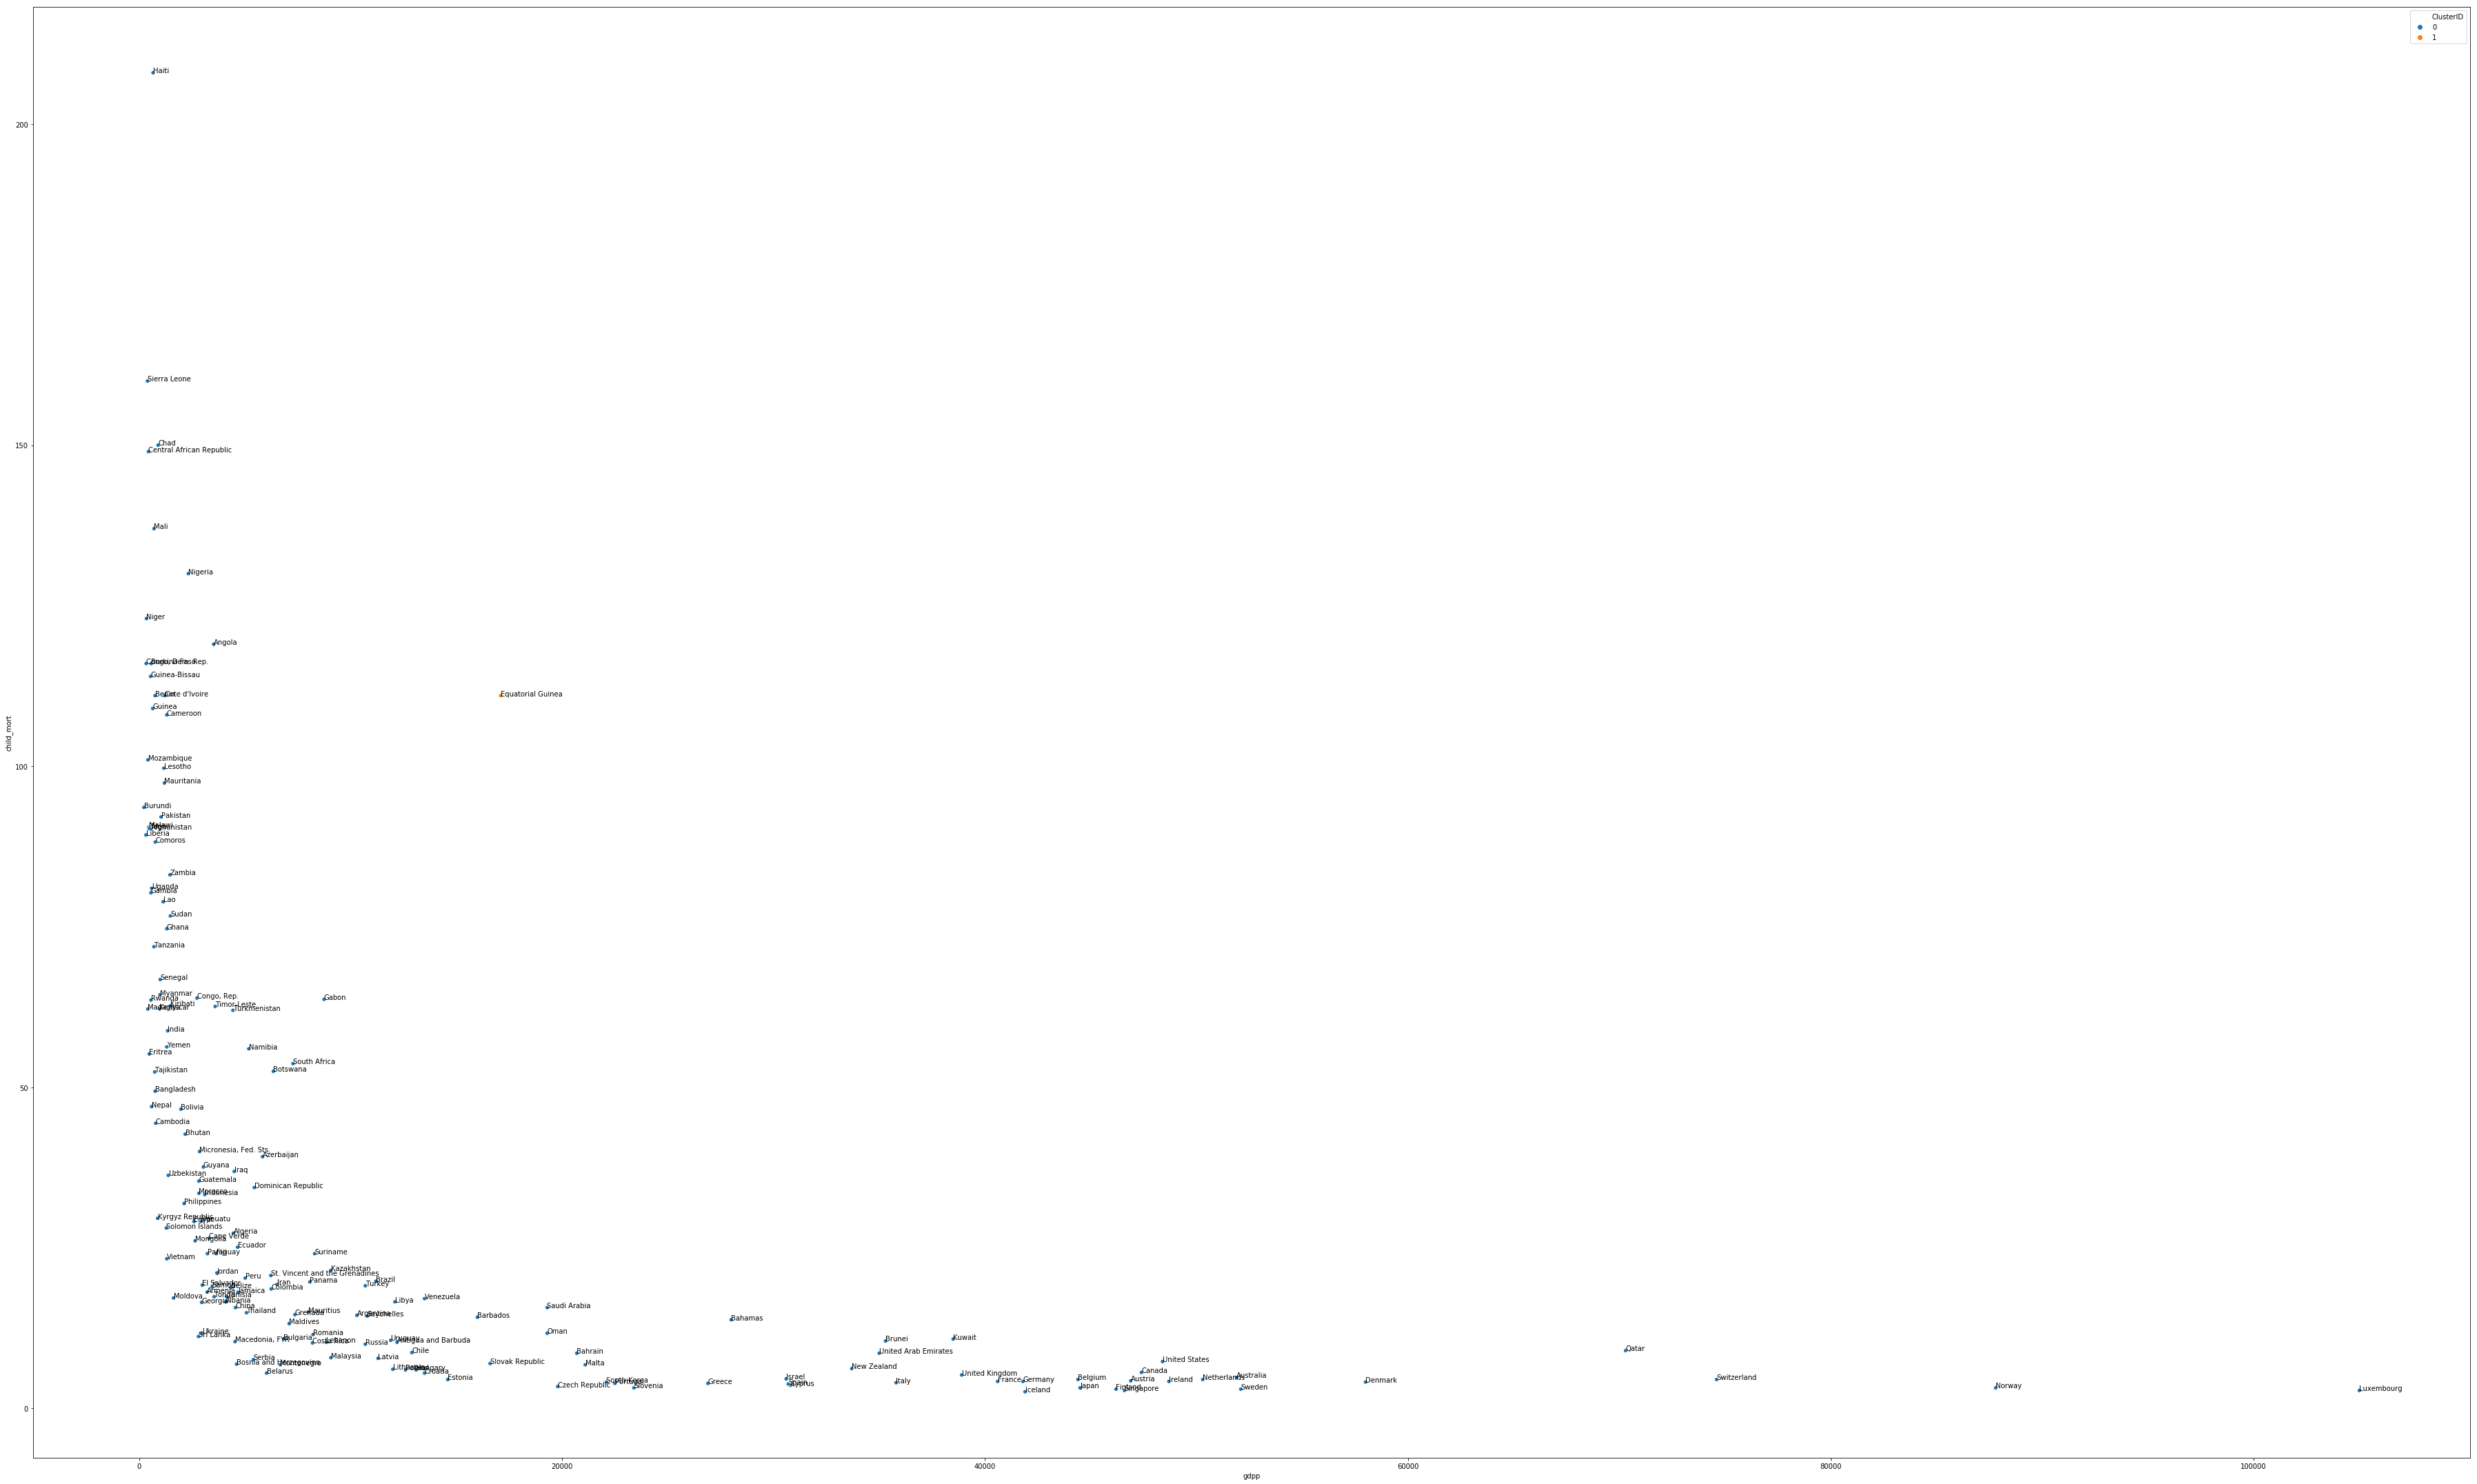

In [109]:
#Scatter plot of countries with gdpp and income with clusters
fig = plt.figure(figsize = (50,30))
sns.scatterplot( x=clustered_data_hc['gdpp'], y=clustered_data_hc['child_mort'], data=clustered_data_hc, hue='ClusterID', legend='full')
plt.xlabel('gdpp')
plt.ylabel('child_mort')
for i, txt in enumerate(clustered_data_hc.country):
    plt.annotate(txt, (clustered_data_hc['gdpp'][i],clustered_data_hc['child_mort'][i]))
plt.tight_layout()
plt.show()

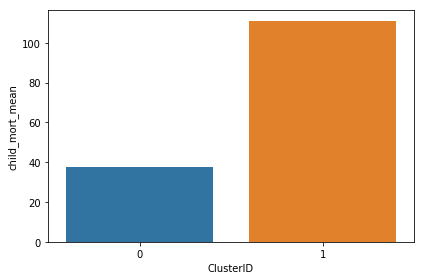

In [110]:
#Analysing child mort rate
sns.barplot(x=dataframe1.ClusterID, y=dataframe1.child_mort_mean)
plt.tight_layout()
plt.show()

As per the above graph cluster Id 0 is having highest child_mort rate mean Where as cluster Id 1 is in second place

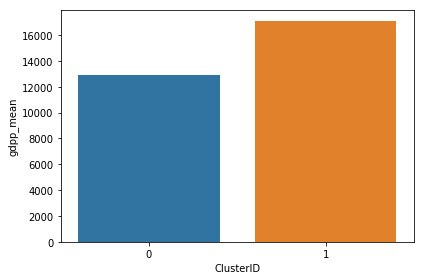

In [111]:
#Analysing gdpp rate
sns.barplot(x=dataframe1.ClusterID, y=dataframe1.gdpp_mean)
plt.tight_layout()
plt.show()

By looking above graph we can understand that cluster Id 0 is having low gdpp where cluster 1 is having high gdpp

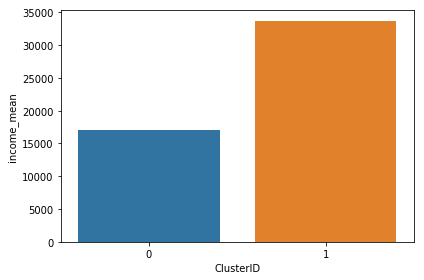

In [112]:
#Analysing income mean
sns.barplot(x=dataframe1.ClusterID, y=dataframe1.income_mean)
plt.tight_layout()
plt.show()

- As per the above graph we can say that cluster id 0 has low income mean where as cluster 1 is in good position
- As per the above dendrograms and analysis it is understood that all countries data are available in cluster 0 and only country in cluster 1 which is not giving right result.
- Hence moving hierarchal clustering with complete linkage

# Hierarchical clustering with complete linkage

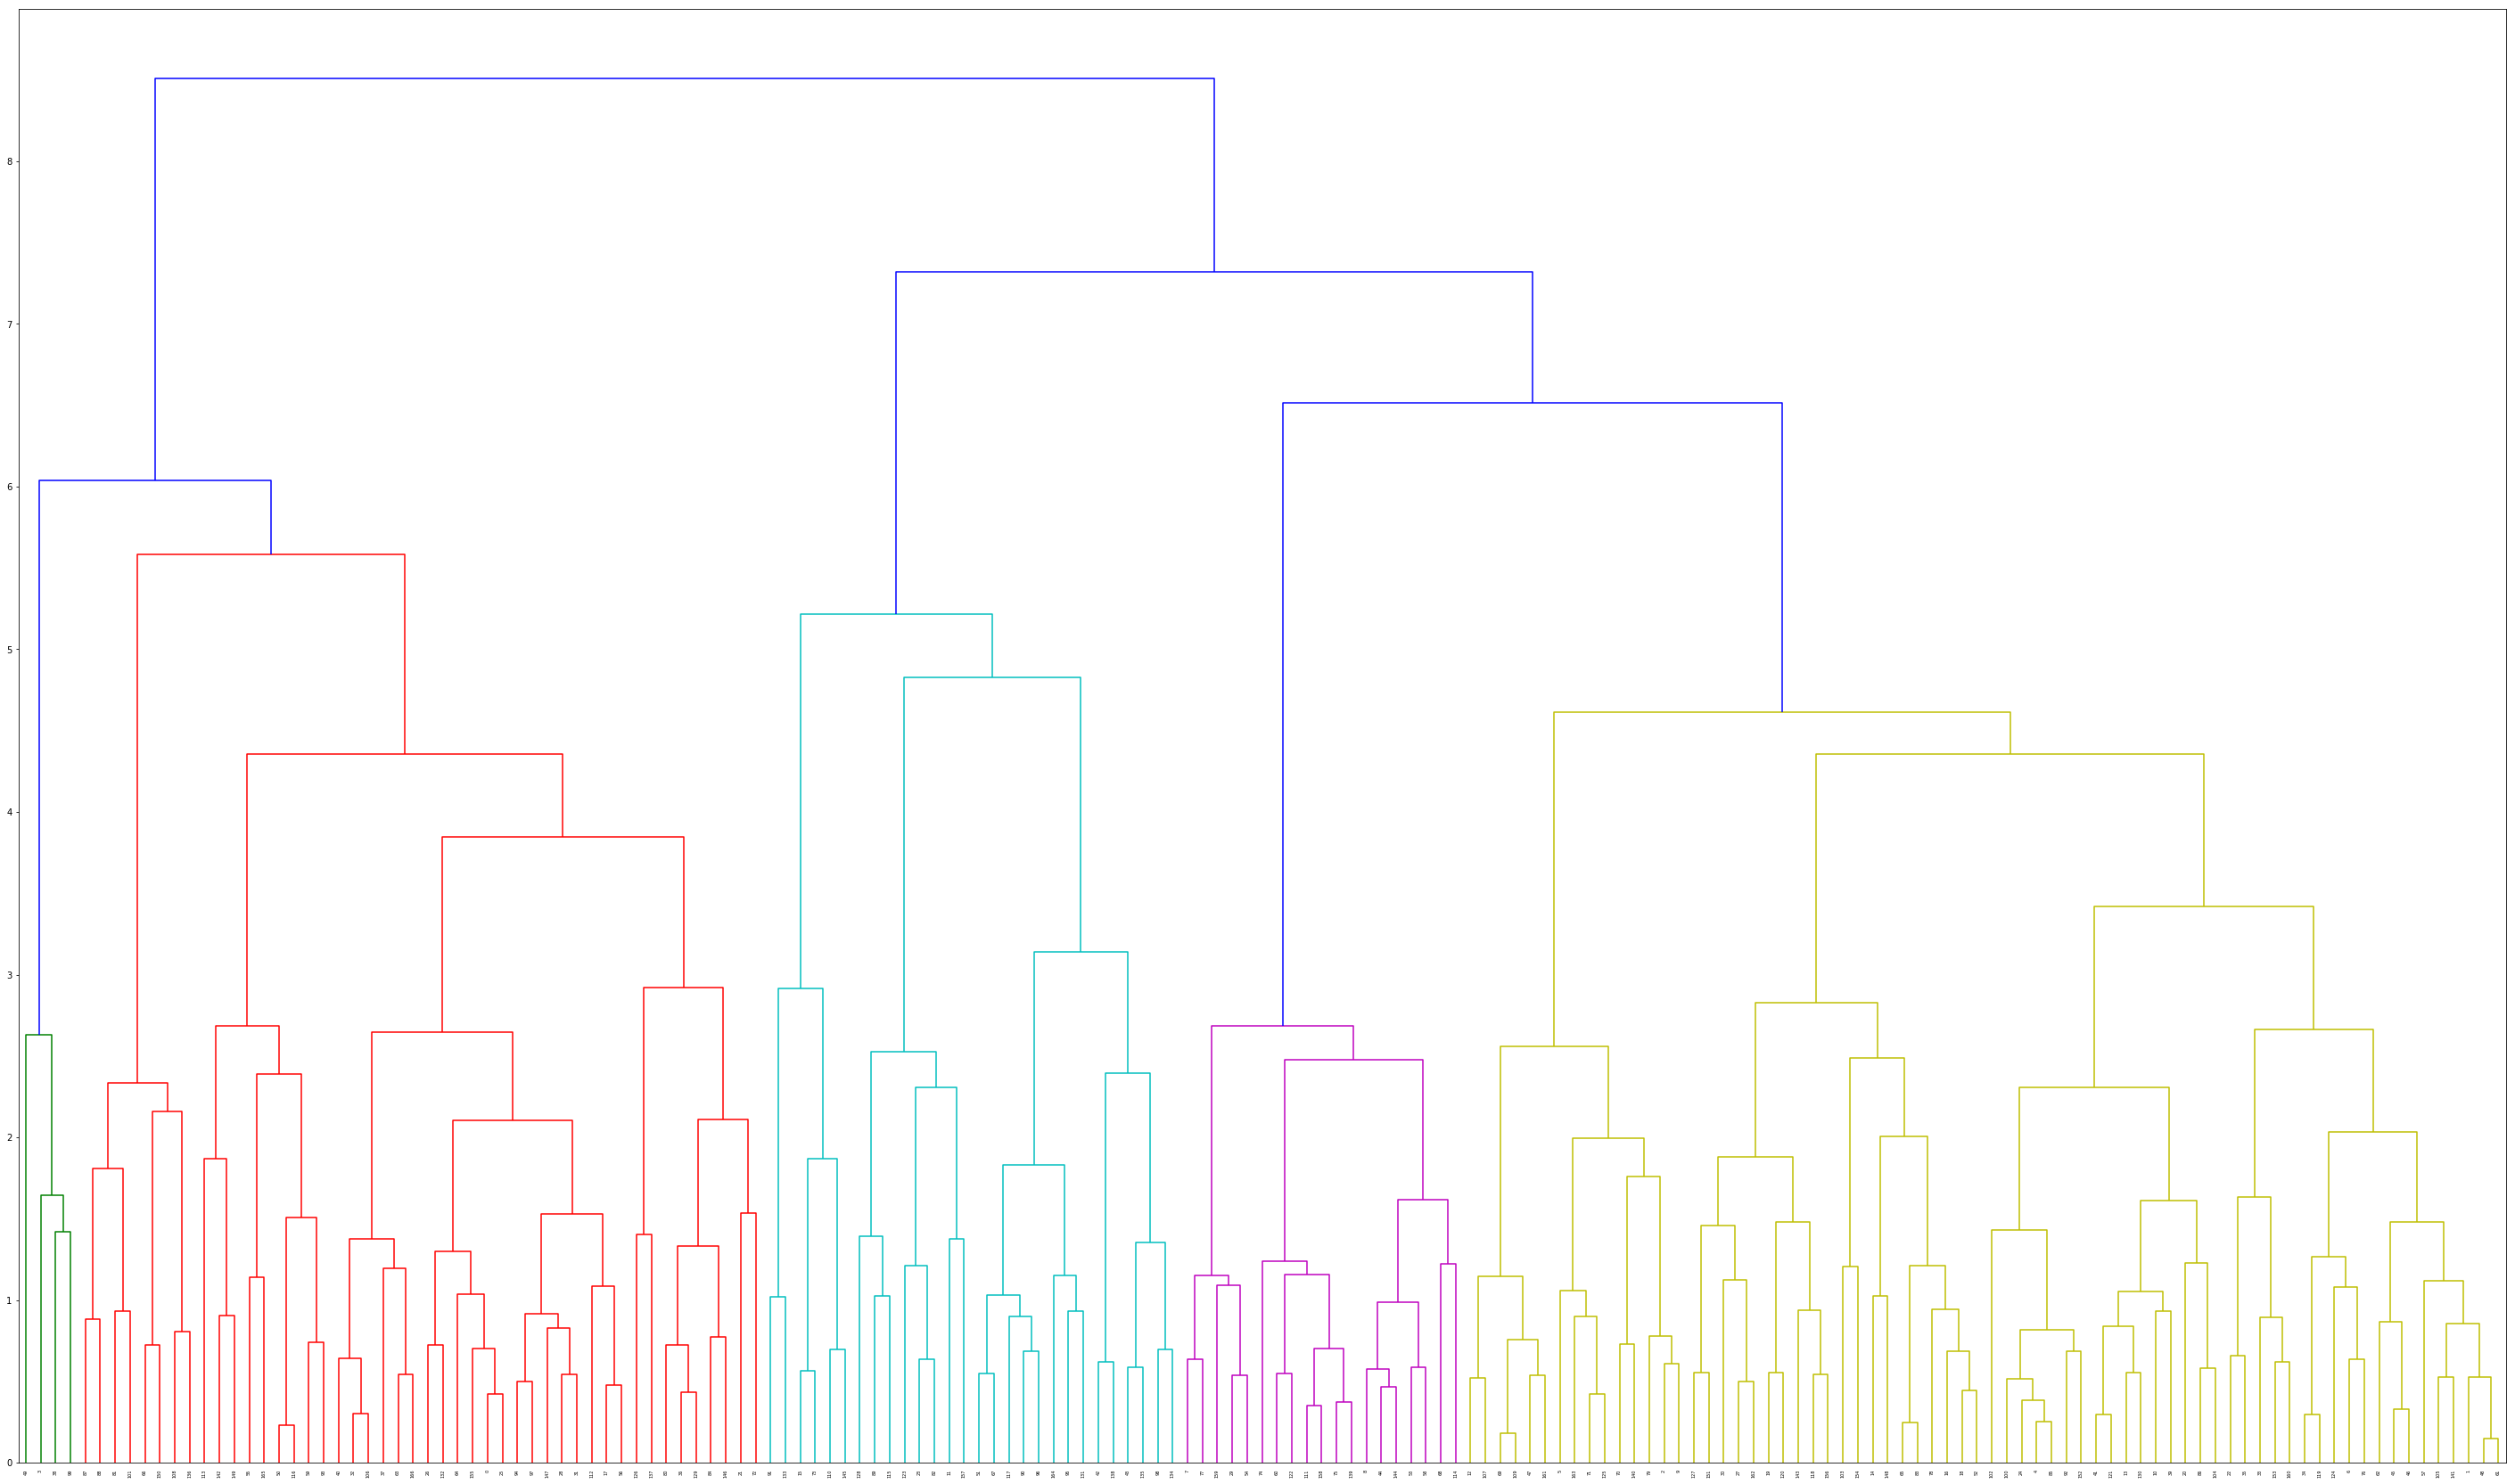

In [113]:
fig = plt.figure(figsize = (50,30))
mergings = linkage(dataframe_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Looking at the dedrogram it is observed that cutting it at n = 5 is most optimal.

In [114]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dataframe_pca_hc = pd.concat([dataframe_pca, clusterCut], axis=1)
dataframe_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
dataframe_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [115]:
pca_cluster_hc = pd.concat([dataframe_backup['country'],dataframe_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


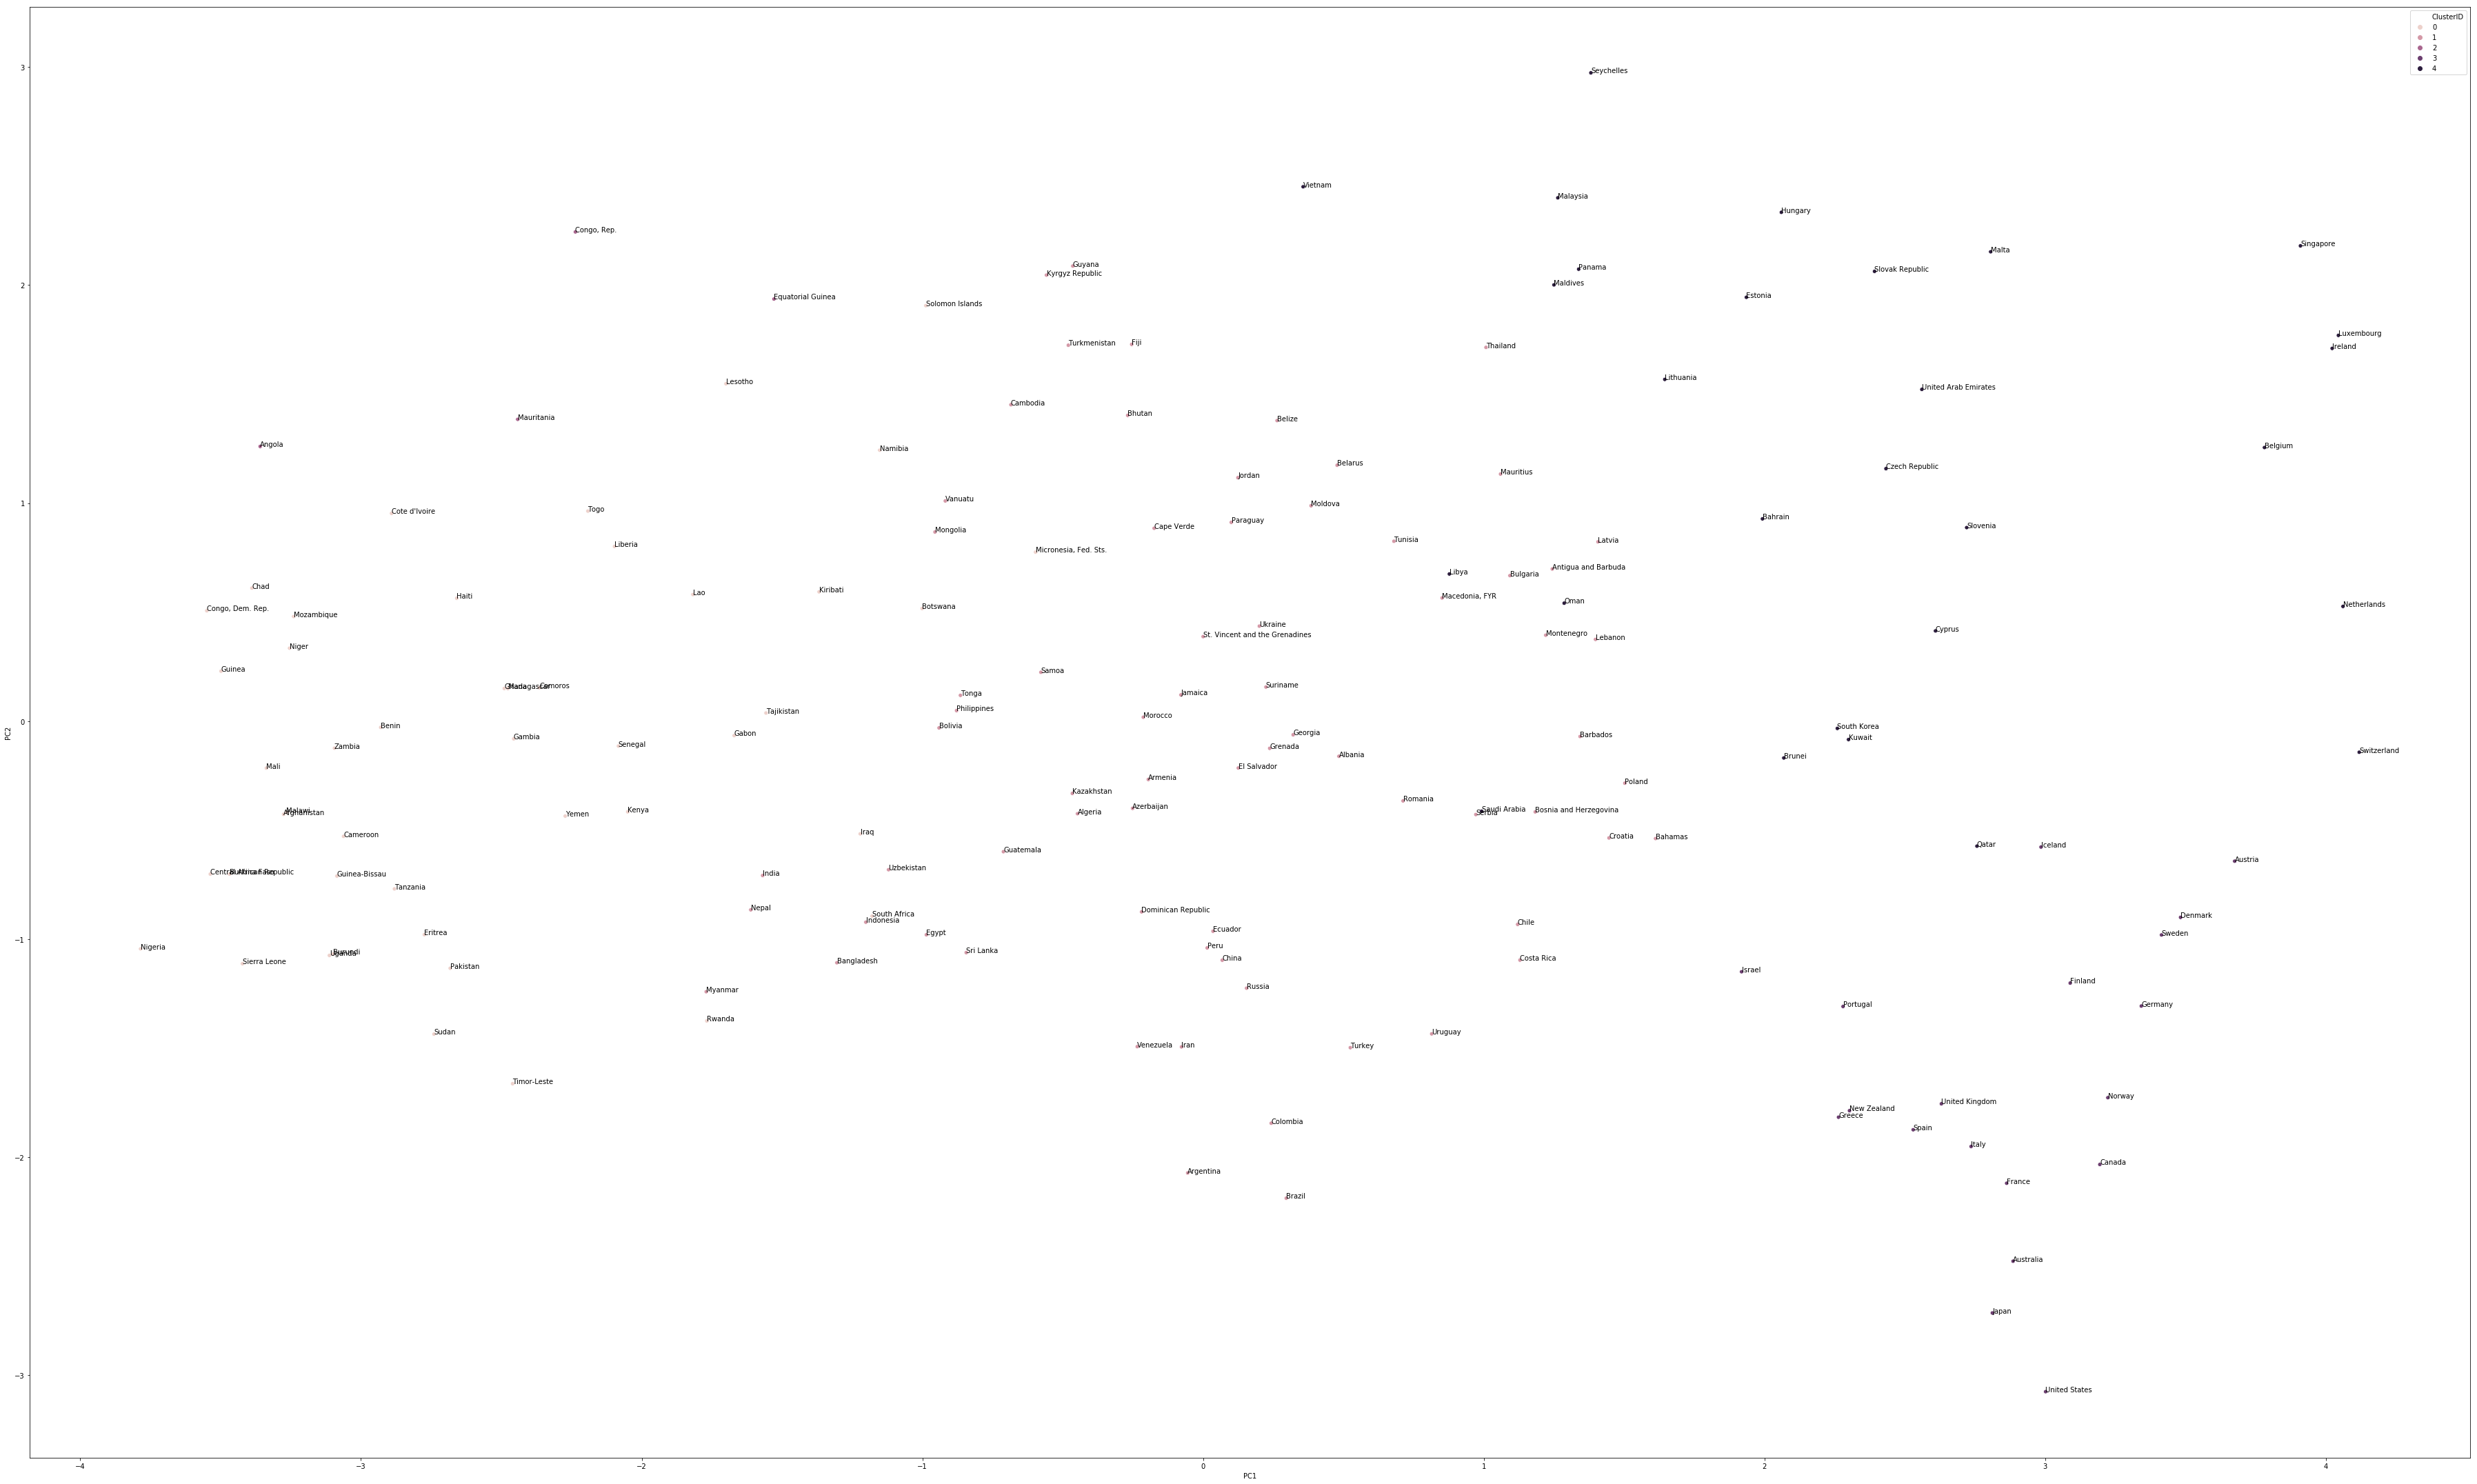

In [116]:
#Scatter plot of countries with PC1 and PC2 with clusters
fig = plt.figure(figsize = (50,30))
sns.scatterplot( x=pca_cluster_hc['PC1'], y=pca_cluster_hc['PC2'], data=pca_cluster_hc, hue='ClusterID', legend='full')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(pca_cluster_hc.country):
    plt.annotate(txt, (pca_cluster_hc['PC1'][i],pca_cluster_hc['PC2'][i]))
plt.tight_layout()
plt.show()

As per the above graph we can say that countries like Nigeria, Sierra, Haiti in cluster 0 with extreme left
Where as Unitd states, Japan, Australia etc are extreme right under cluster 4

In [117]:
#As per problem statement, we need first 2 PC components
clustered_data_hc = pca_cluster_hc[["country",'ClusterID', 'PC1', 'PC2']].merge(dataframe,on = "country")
clustered_data_hc.head()

,country,ClusterID,PC1,PC2,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,-3.275720,-0.427284,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,0.483960,-0.161179,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,-0.447318,-0.424388,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,-3.359135,1.259644,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,1.244074,0.697703,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [118]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [122]:
dataframe2 = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
dataframe2.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
dataframe2

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


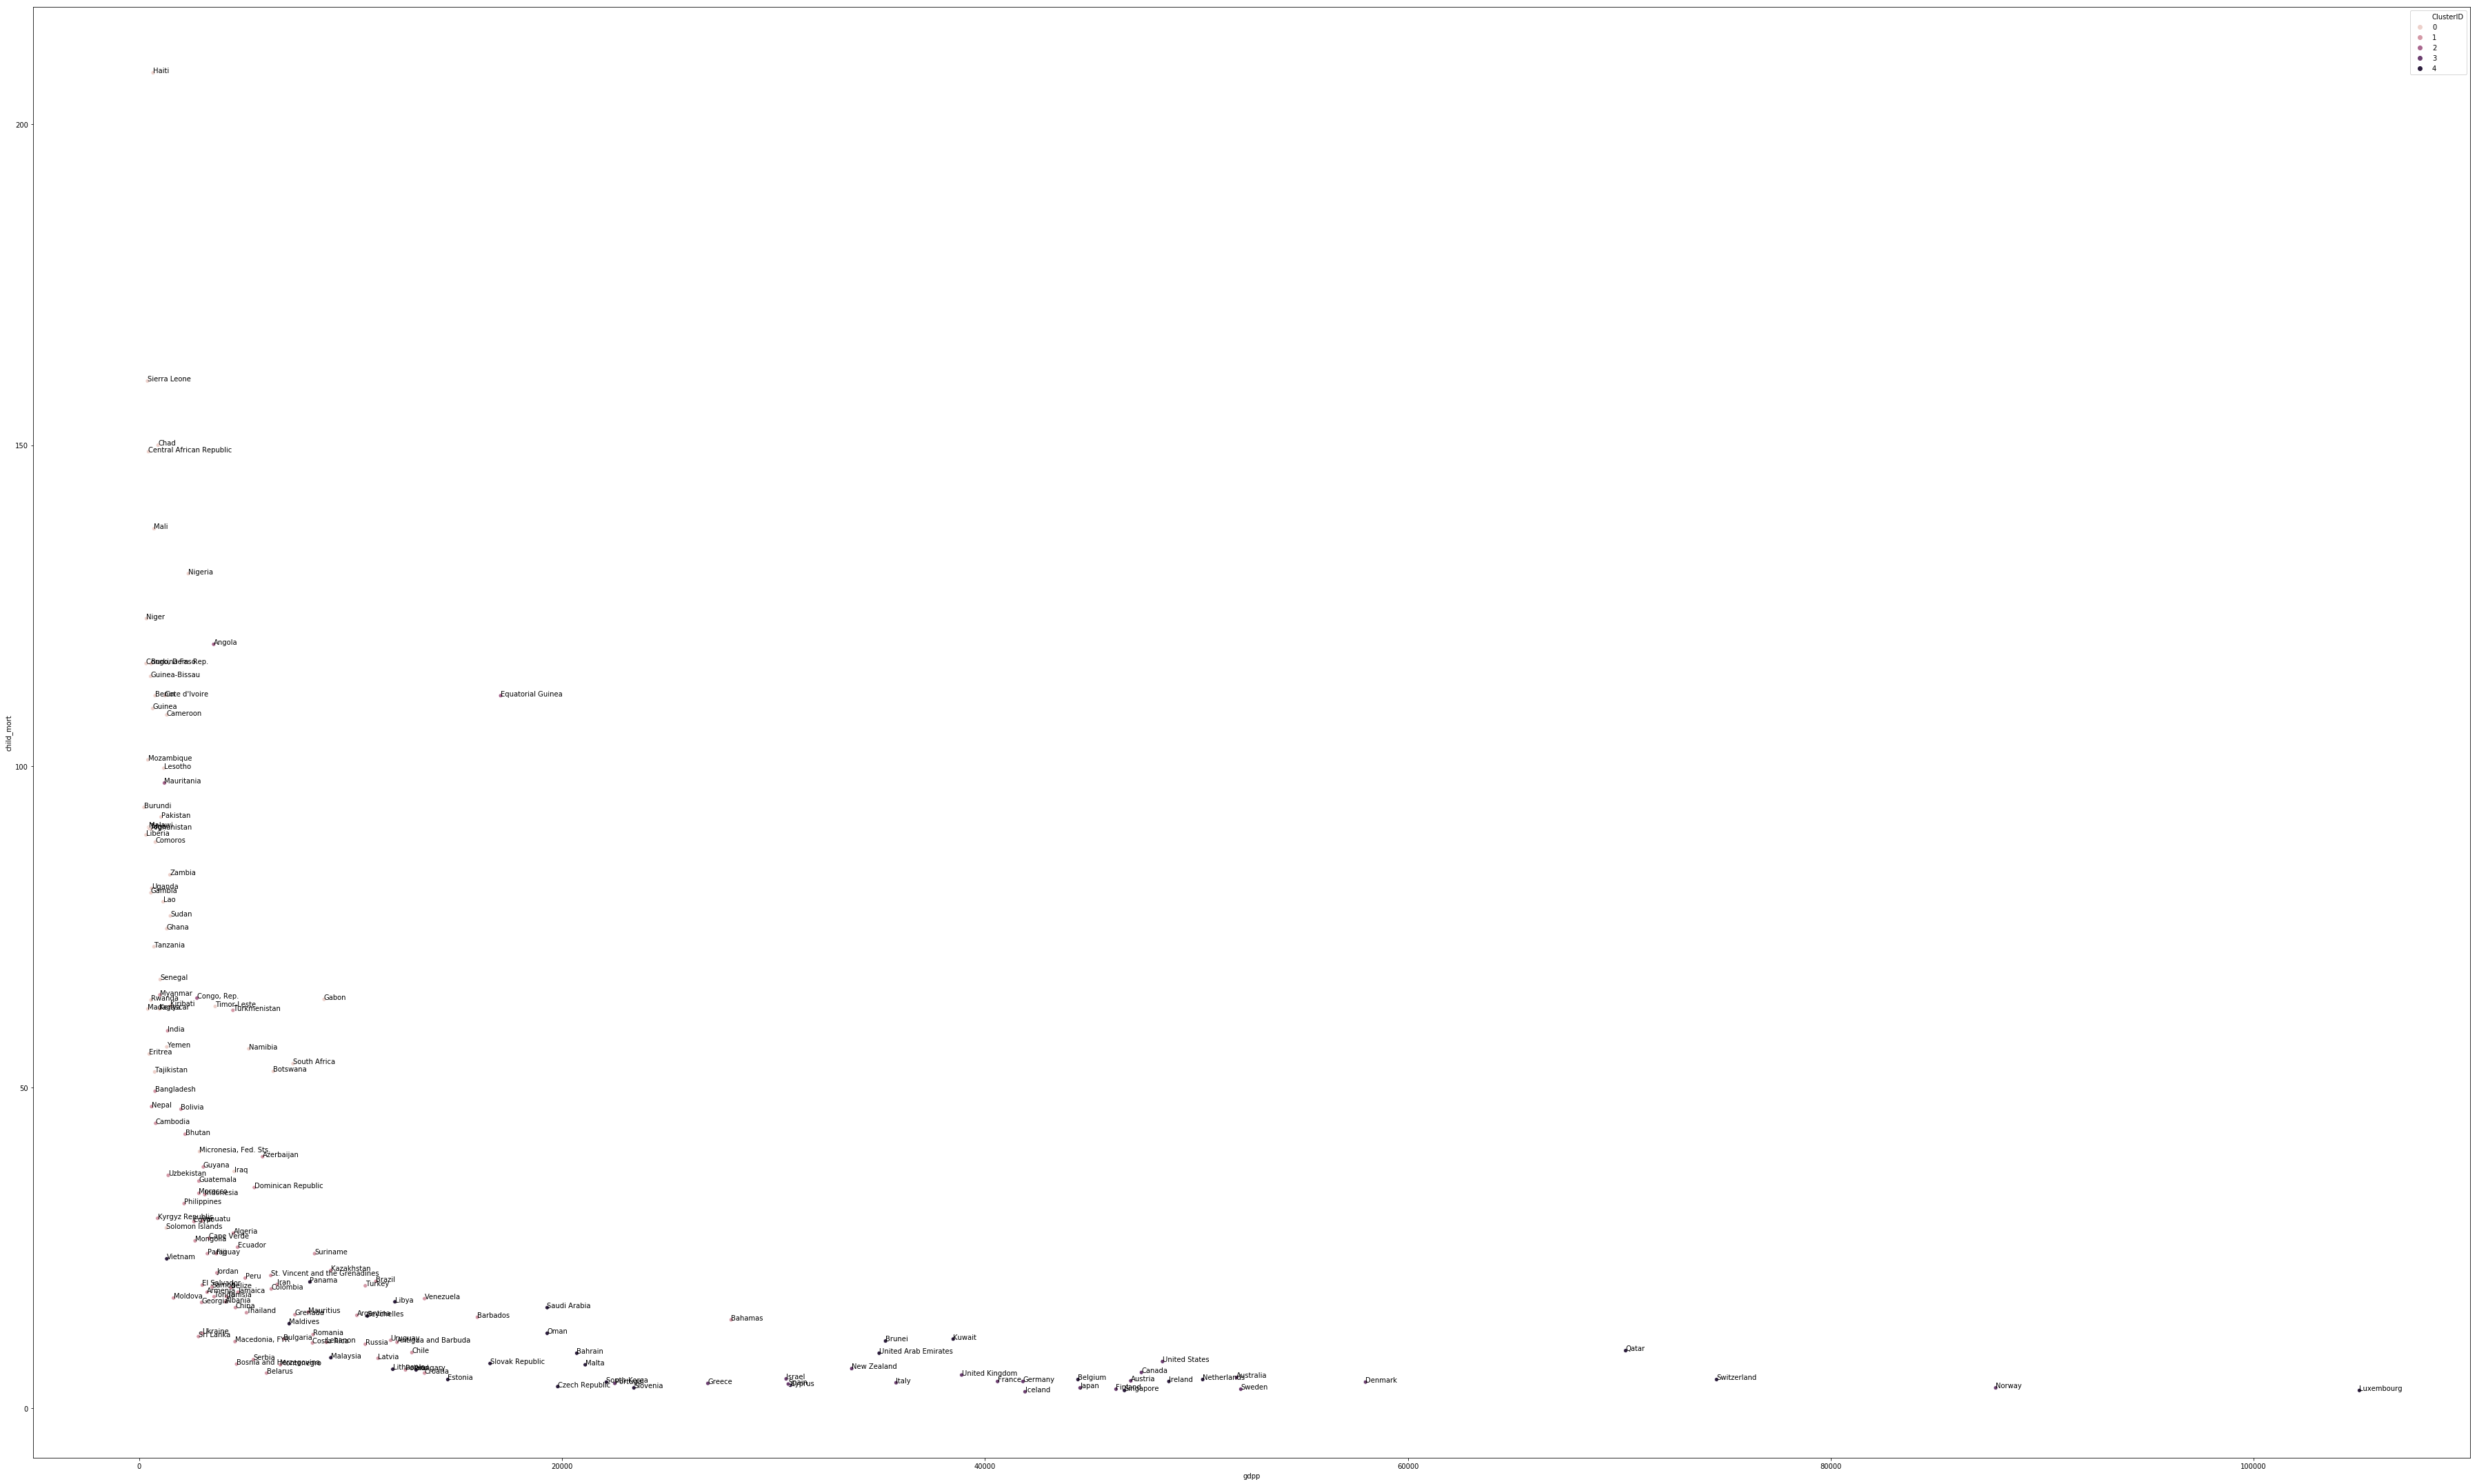

In [123]:
#Scatter plot of countries with gdpp and income with clusters
fig = plt.figure(figsize = (50,30))
sns.scatterplot( x=clustered_data_hc['gdpp'], y=clustered_data_hc['child_mort'], data=clustered_data_hc, hue='ClusterID', legend='full')
plt.xlabel('gdpp')
plt.ylabel('child_mort')
for i, txt in enumerate(clustered_data_hc.country):
    plt.annotate(txt, (clustered_data_hc['gdpp'][i],clustered_data_hc['child_mort'][i]))
plt.tight_layout()
plt.show()

- As per the above graph we can understand that Haiti is having high child_mort rate with low gdpp in cluster 0, where luxembourg is having high gdpp with low child_mort in cluster 4

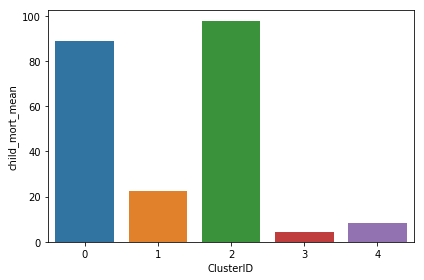

In [124]:
#Analysing child mort rate
sns.barplot(x=dataframe2.ClusterID, y=dataframe2.child_mort_mean)
plt.tight_layout()
plt.show()

- As per the above graph cluster Id 2 is having highest child_mort rate mean where as cluster Id 0 is in second place

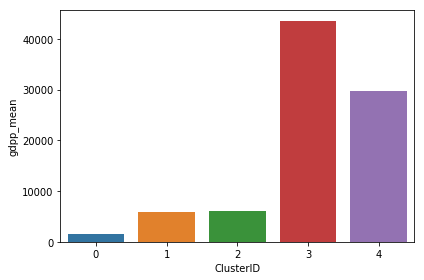

In [125]:
#Analysing gdpp rate
sns.barplot(x=dataframe2.ClusterID, y=dataframe2.gdpp_mean)
plt.tight_layout()
plt.show()

- As per the above graph we can understand that cluster Id 0 is having low gdpp where cluster 3 is having high gdpp around 45000

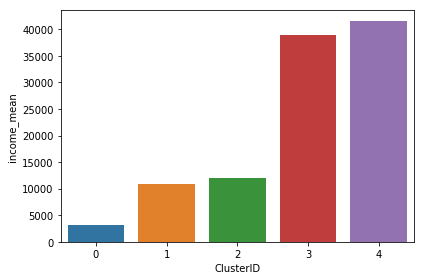

In [126]:
#Analysing income mean
sns.barplot(x=dataframe2.ClusterID, y=dataframe2.income_mean)
plt.tight_layout()
plt.show()

- As per the above graph we can say cluster id 0 is having low income mean where as cluster 3 and 4 are in good position
- By analysing gdpp, income and child_mort, cluster 0 would be having under developed countries.

In [127]:
#List out all countries in Cluster Id 0
print(clustered_data_hc[clustered_data_hc.ClusterID==0].country.values)
print(len(clustered_data_hc[clustered_data_hc.ClusterID==0].country.values))

['Afghanistan' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya' 'Kiribati' 'Lao' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Micronesia, Fed. Sts.'
 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
46


There are total 31 countries under developed countries under cluster 0
By looking above gdpp, income, child_mort, cluster 3 and 4 having good economical countries

In [128]:
print(clustered_data_hc[clustered_data_hc.ClusterID==3].country.values)
print(len(clustered_data_hc[clustered_data_hc.ClusterID==3].country.values))

['Australia' 'Austria' 'Canada' 'Denmark' 'Finland' 'France' 'Germany'
 'Greece' 'Iceland' 'Israel' 'Italy' 'Japan' 'New Zealand' 'Norway'
 'Portugal' 'Spain' 'Sweden' 'United Kingdom' 'United States']
19


There are almost 30 economically developed countries under cluster 3

In [129]:
#We will get list countries in cluster 4 

print(clustered_data_hc[clustered_data_hc.ClusterID==4].country.values)
print(len(clustered_data_hc[clustered_data_hc.ClusterID==4].country.values))

['Bahrain' 'Belgium' 'Brunei' 'Cyprus' 'Czech Republic' 'Estonia'
 'Hungary' 'Ireland' 'Kuwait' 'Libya' 'Lithuania' 'Luxembourg' 'Malaysia'
 'Maldives' 'Malta' 'Netherlands' 'Oman' 'Panama' 'Qatar' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea'
 'Switzerland' 'United Arab Emirates' 'Vietnam']
28


There are also another 21 economically developed countries under cluster 4

In [130]:
#So final list of underdeveloped countries should be considered from hierarchal cluster
print(clustered_data_hc[clustered_data_hc.ClusterID==0].country.values)
print(len(clustered_data_hc[clustered_data_hc.ClusterID==0].country.values))

['Afghanistan' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya' 'Kiribati' 'Lao' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Micronesia, Fed. Sts.'
 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
46


 There are total 31 countries under developed countries under cluster 0 for hierarchal clustering

# Identifying top 5 countries from cluster 0 having underdeveloped countries

In [131]:
new_hc_data = clustered_data_hc[clustered_data_hc.ClusterID==0]

In [132]:
new_hc_data.head()

,country,ClusterID,PC1,PC2,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,-3.275720,-0.427284,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
17,Benin,0,-2.929756,-0.028483,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
21,Botswana,0,-1.000969,0.516724,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350
25,Burkina Faso,0,-3.468154,-0.701102,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,Burundi,0,-3.099530,-1.067768,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231


In [133]:
#Sorting based on low gdpp, high child_mortage, low income
new_hc_data = new_hc_data.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True])
new_hc_data.head()

,country,ClusterID,PC1,PC2,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,0,-3.099530,-1.067768,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,0,-2.096858,0.801032,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",0,-3.549218,0.506206,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,0,-3.254409,0.334593,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,0,-3.422051,-1.112147,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [134]:
new_hc_data['country'].head()

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

Final top 5 countries which need immediate aid
- Burundi
- Madagascar
- Congo, Dem. Rep.
- Niger
- Sierra Leone